In [53]:
# loading the library required for data loading and processing
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [54]:
# read the data using pandas function from 'innercity.csv' file
house_df = pd.read_excel('innercity.xlsx')

In [55]:
# let's check whether data loaded successfully or not, by checking first few records
house_df.head()

cid         dayhours     price  room_bed  room_bath  \
0  3.876101e+09  20150427T000000  600000.0       4.0       1.75   
1  3.145600e+09  20150317T000000  190000.0       2.0       1.00   
2  7.129303e+09  20140820T000000  735000.0       4.0       2.75   
3  7.338220e+09  20141010T000000  257000.0       3.0       2.50   
4  7.950301e+09  20150218T000000  450000.0       2.0       1.00   

   living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
0          3050.0       9440.0  1.0   0.0    0.0  ...   1250.0    1966.0   
1           670.0       3101.0  1.0   0.0    0.0  ...      0.0    1948.0   
2          3040.0       2415.0  2.0   1.0    4.0  ...      0.0    1966.0   
3          1740.0       3721.0  2.0   0.0    0.0  ...      0.0    2009.0   
4          1120.0       4590.0  1.0   0.0    0.0  ...      0.0    1924.0   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0           0.0  98034.0  47.7228 -122.183            2020.0         8660.0   
1           0.0  98118.0  47.5546 -122.274            1660.0         4100.0   
2           0.0  98118.0  47.5188 -122.256            2620.0         2433.0   
3           0.0  98002.0  47.3363 -122.213            2030.0         3794.0   
4           0.0  98118.0  47.5663 -122.285            1120.0         5100.0   

  furnished  total_area  
0       0.0     12490.0  
1       0.0      3771.0  
2       0.0      5455.0  
3       0.0      5461.0  
4       0.0      5710.0  

[5 rows x 23 columns]

In [56]:
# print the number of records and features/aspects we have in the provided file
house_df.shape

(21613, 23)

In [57]:
# let's check out the columns/features we have in the dataset
house_df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [83]:
# let's see the data types of the features
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  float64
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  float64
 3   room_bed          21613 non-null  float64
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  float64
 6   lot_measure       21613 non-null  float64
 7   ceil              21613 non-null  object 
 8   coast             21613 non-null  float64
 9   sight             21613 non-null  float64
 10  condition         21613 non-null  float64
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  float64
 16  zipcode           21613 non-null  float6

In [130]:
# let's check whether our dataset have any null/missing values
house_df.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [133]:
house_df.long.value_counts()

-122.290    150
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-122.457      1
-122.474      1
-121.750      1
-121.893      1
-121.947      1
Name: long, Length: 752, dtype: int64

In [67]:
# Treatment of missing values
house_df['room_bed'] = house_df['room_bed'].fillna(house_df['room_bed'].mode()[0])

In [68]:
house_df['room_bath'] = house_df['room_bath'].fillna(house_df['room_bath'].mode()[0])

In [69]:
house_df['living_measure'] = house_df['living_measure'].fillna(house_df['living_measure'].mode()[0])

In [70]:
house_df['lot_measure'] = house_df['lot_measure'].fillna(house_df['lot_measure'].mode()[0])

In [71]:
house_df['ceil'] = house_df['ceil'].fillna(house_df['ceil'].mode()[0])

In [74]:
house_df['sight'] = house_df['sight'].fillna(house_df['sight'].mode()[0])

In [81]:
house_df['condition'] = house_df['condition'].fillna(house_df['condition'].mode()[0])

In [85]:
house_df['quality'] = house_df['quality'].fillna(house_df['quality'].mode()[0])

In [104]:
house_df['furnished'] = house_df['furnished'].fillna(house_df['furnished'].mode()[0])

In [132]:
house_df['long'] = house_df['long'].replace('$',-122.290)

In [128]:
house_df['total_area'] = house_df['total_area'].fillna(house_df['living_measure'] + house_df['living_measure'])

In [249]:
import plotly.express as px
import pandas as pd
fig = px.scatter_geo(house_df,lat='lat',lon='long', )
fig.update_layout(title = 'lat long, 2014-2015', title_x=0.5)
fig.show()

In [109]:
# let's check whether there's any duplicate record in our dataset or not. If present, we have to remove them
house_df.duplicated().sum()

0

In [172]:
# let's do the 5 - factor analysis of the features
house_df.describe().transpose()

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.369500e+00  9.283307e-01  0.000000e+00   
room_bath         21613.0  2.117094e+00  7.688002e-01  0.000000e+00   
living_measure    21613.0  2.079247e+03  9.183951e+02  2.900000e+02   
lot_measure       21613.0  1.508495e+04  4.138574e+04  5.200000e+02   
ceil              21613.0  1.492481e+00  5.397630e-01  1.000000e+00   
coast             21613.0  7.449220e-03  8.598879e-02  0.000000e+00   
sight             21613.0  2.337482e-01  7.655206e-01  0.000000e+00   
condition         21613.0  3.407718e+00  6.499332e-01  1.000000e+00   
quality           21613.0  7.656827e+00  1.175465e+00  1.000000e+00   
ceil_measure      21613.0  1.788344e+03  8.280900e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built          21613.0  1.971039e+03  2.938506e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222140e+02  1.407899e-01 -1.225190e+02   
living_measure15  21613.0  1.983632e+03  6.839963e+02  3.990000e+02   
lot_measure15     21613.0  1.275612e+04  2.727016e+04  6.510000e+02   
furnished         21613.0  1.964558e-01  3.973264e-01  0.000000e+00   
total_area        21613.0  1.716663e+04  4.156860e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.420000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.032000e+03  7.606000e+03  1.066000e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.830000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008000e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.026000e+03  9.562000e+03  1.298400e+04  1.652659e+06

In [111]:
house_df.iloc[:, 2:].columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area'],
      dtype='object')

price
Skew :  4.022


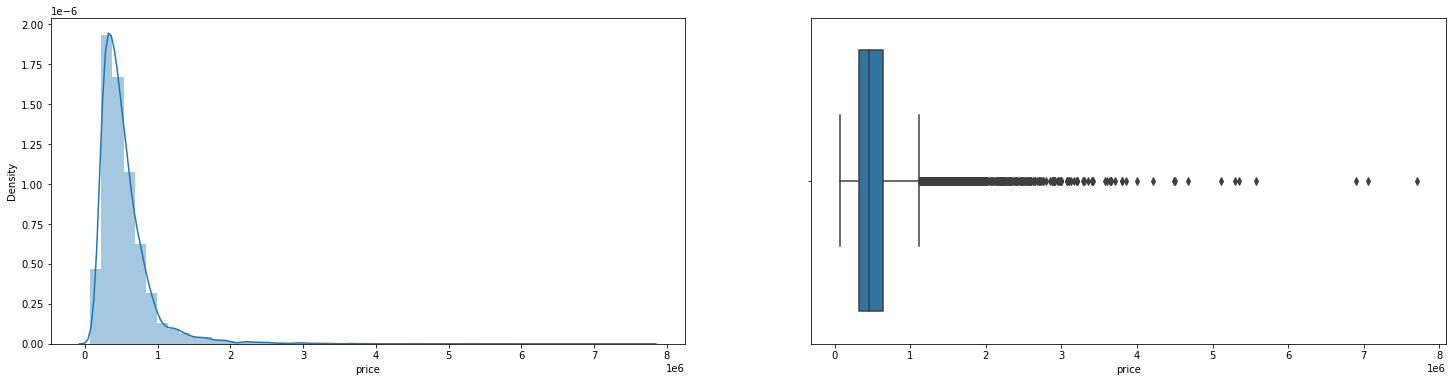

room_bed
Skew :  1.989


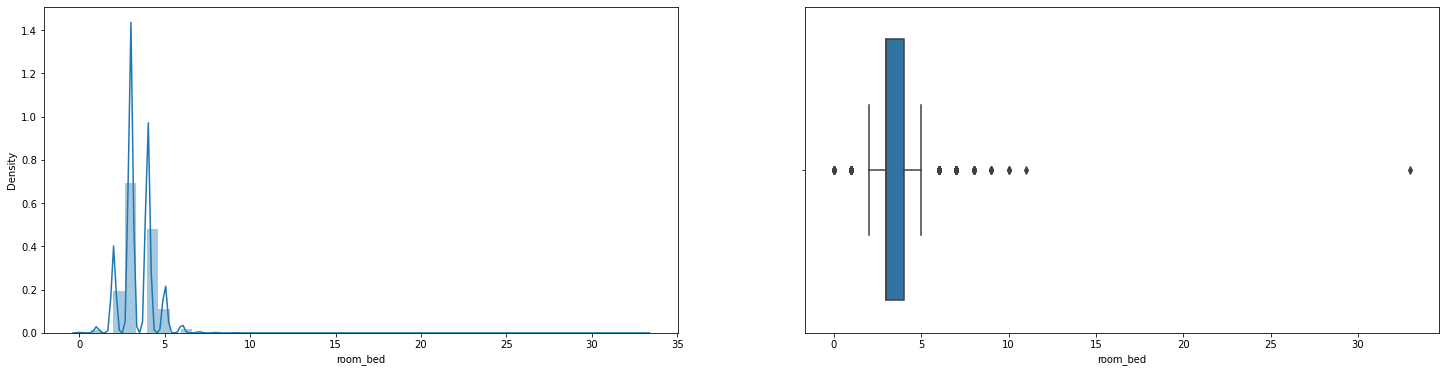

room_bath
Skew :  0.505


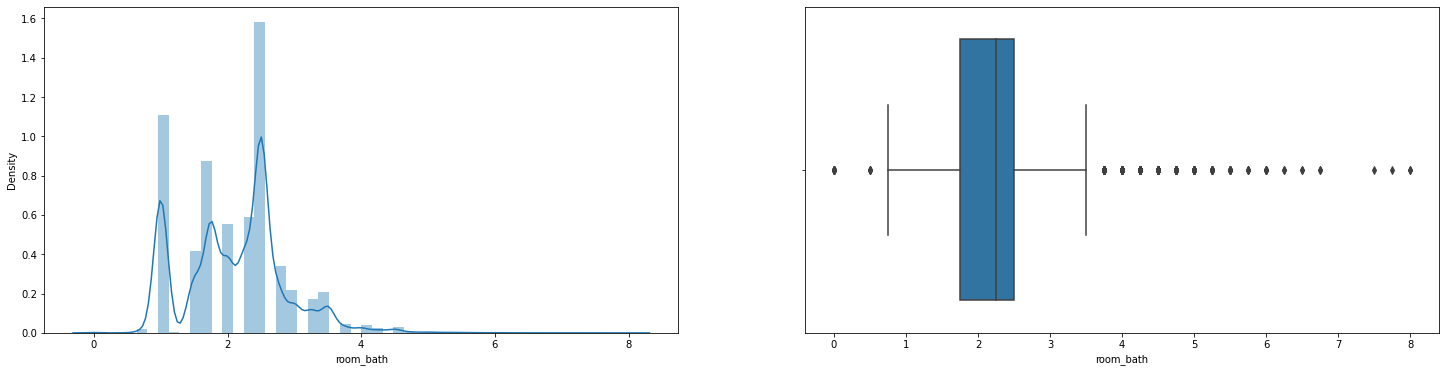

living_measure
Skew :  1.473


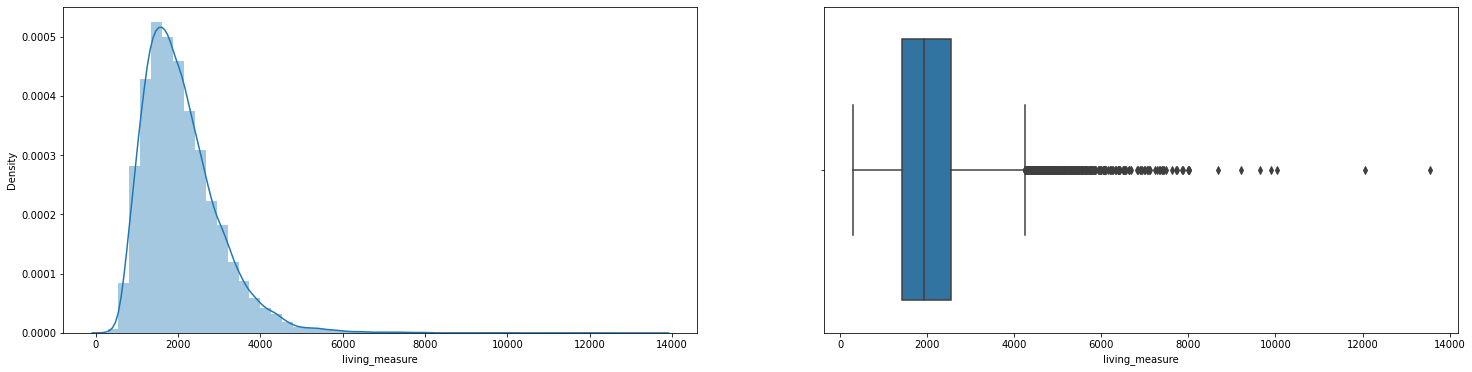

lot_measure
Skew :  13.084


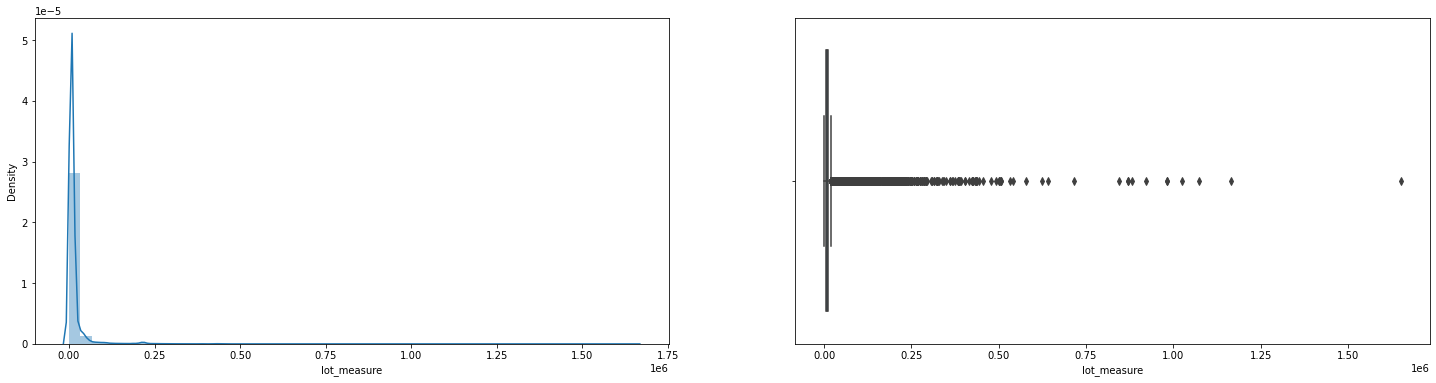

ceil
Skew :  0.622


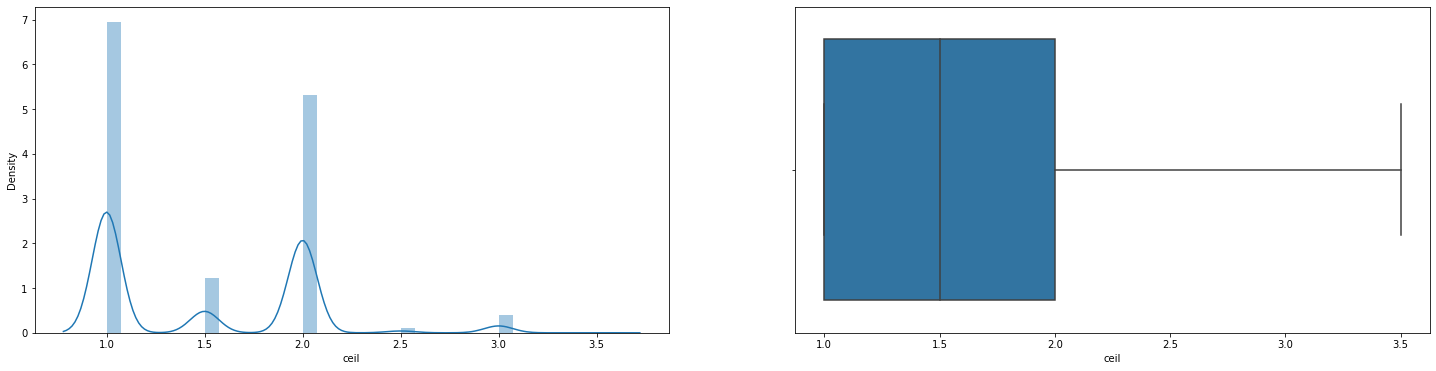

coast
Skew :  11.457


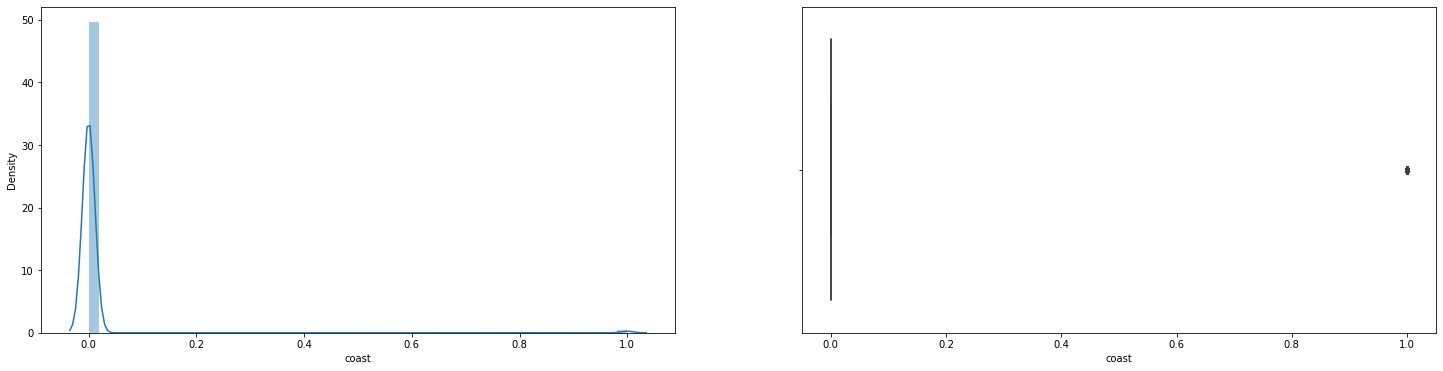

sight
Skew :  3.401


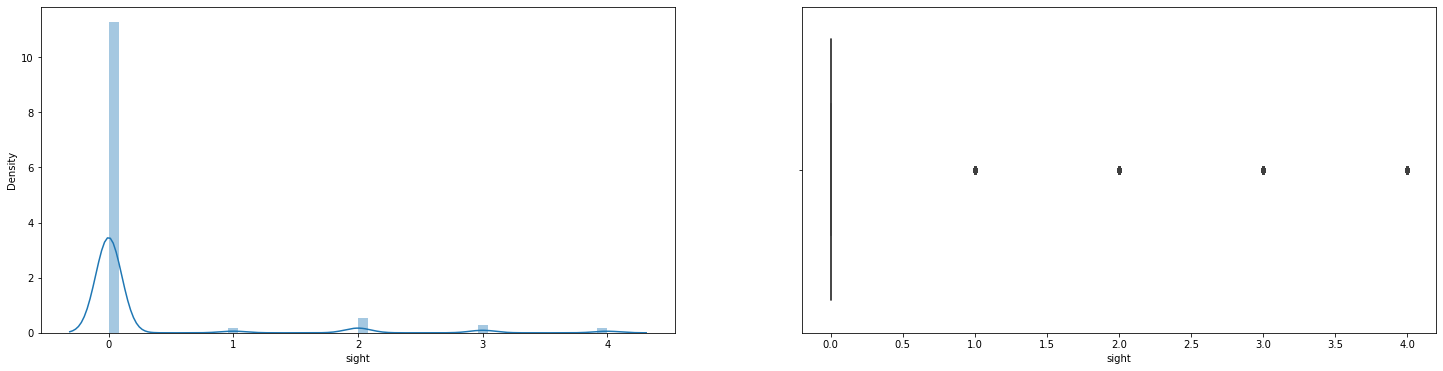

condition
Skew :  1.039


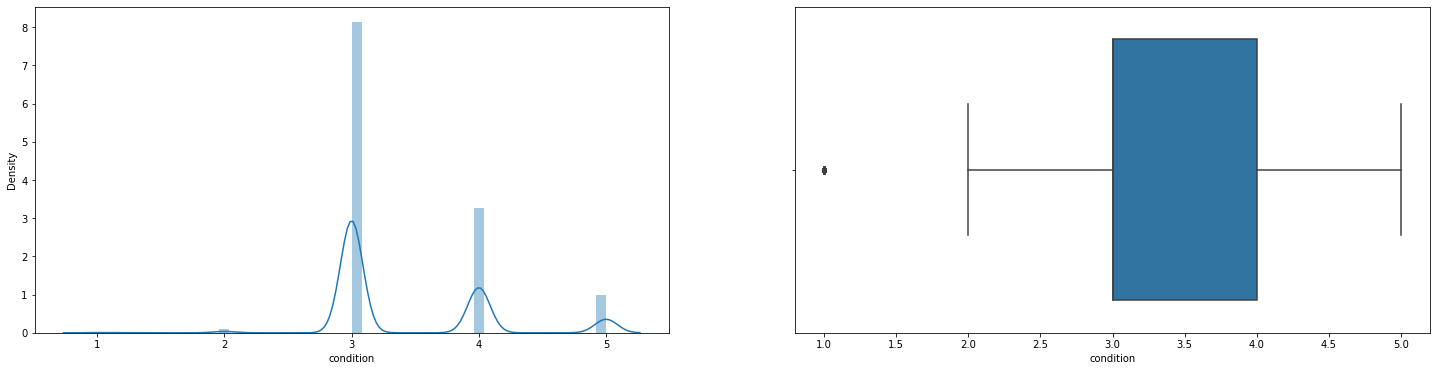

quality
Skew :  0.771


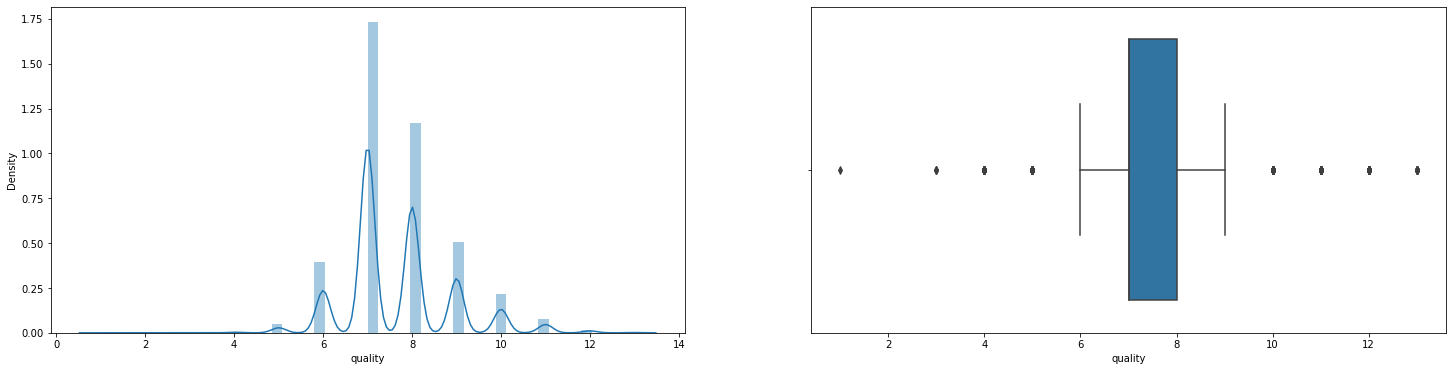

ceil_measure
Skew :  1.447


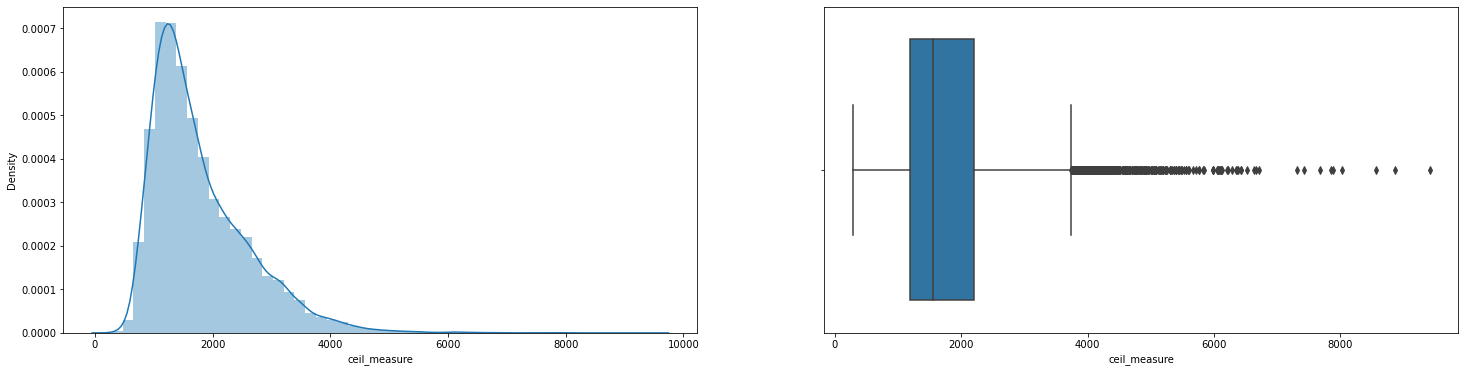

basement
Skew :  1.578


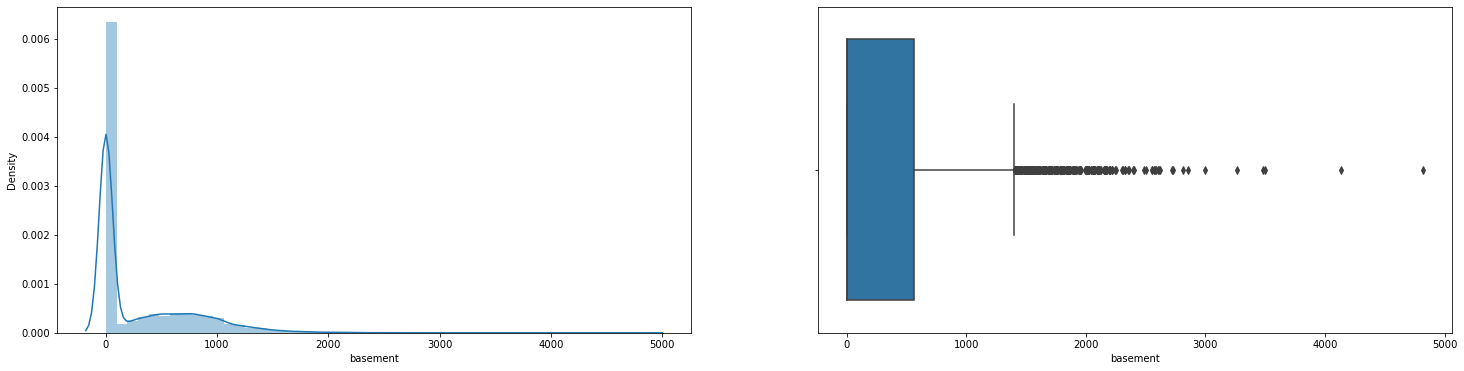

yr_built
Skew :  -0.47


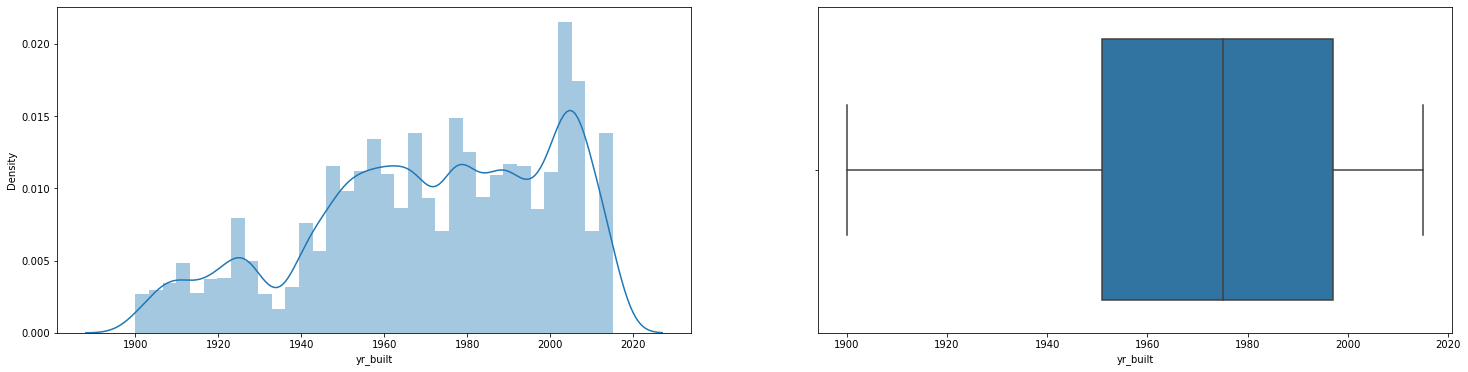

yr_renovated
Skew :  4.549


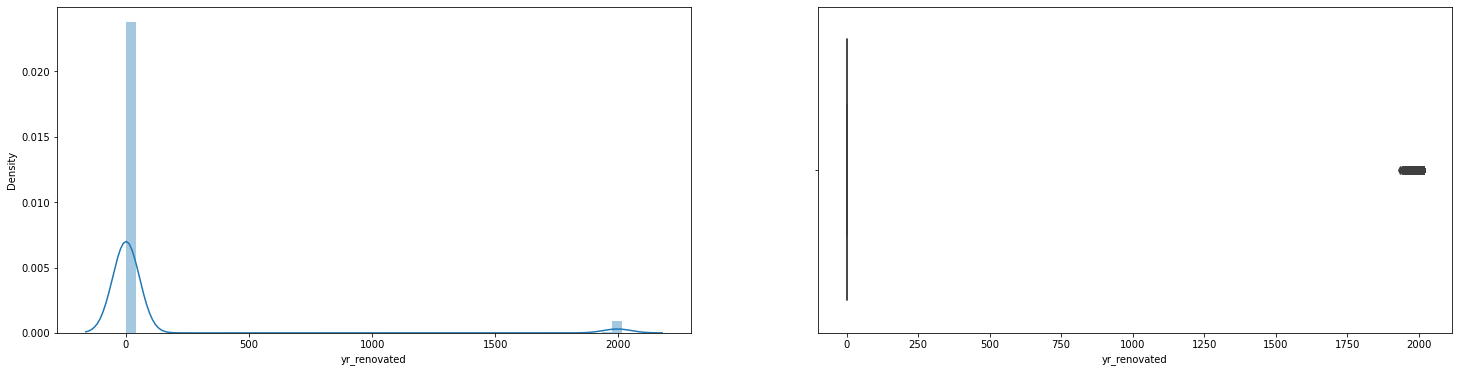

zipcode
Skew :  0.406


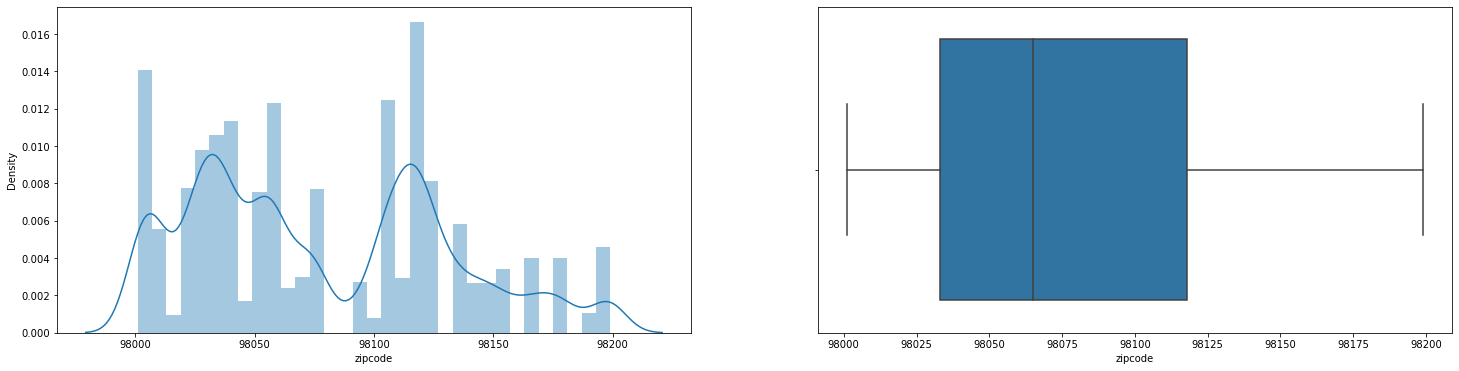

lat
Skew :  -0.485


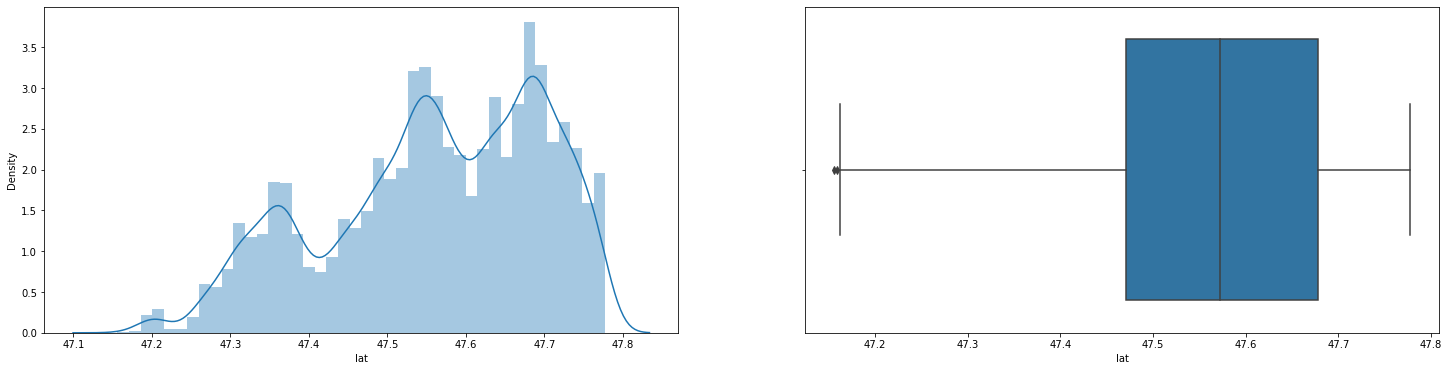

long
Skew :  0.887


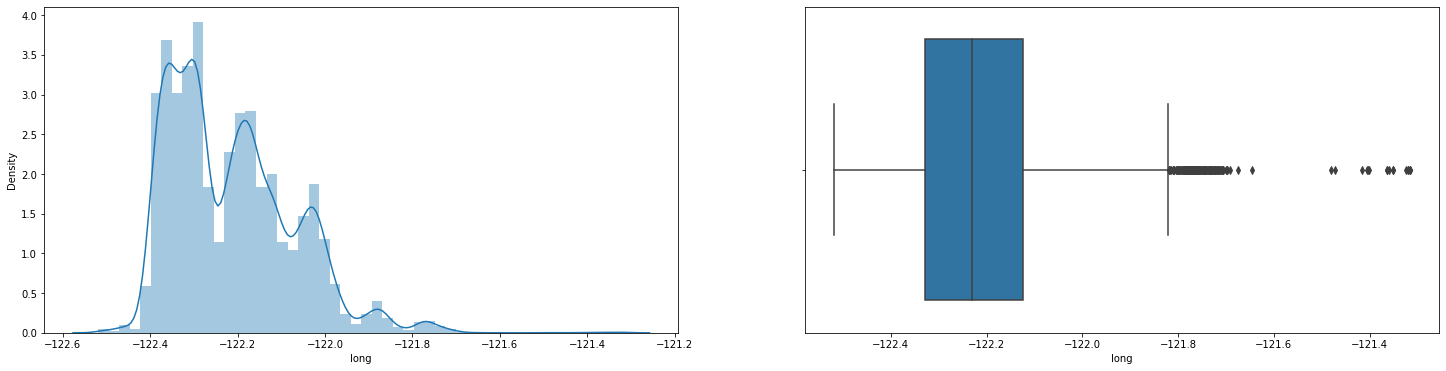

living_measure15
Skew :  1.12


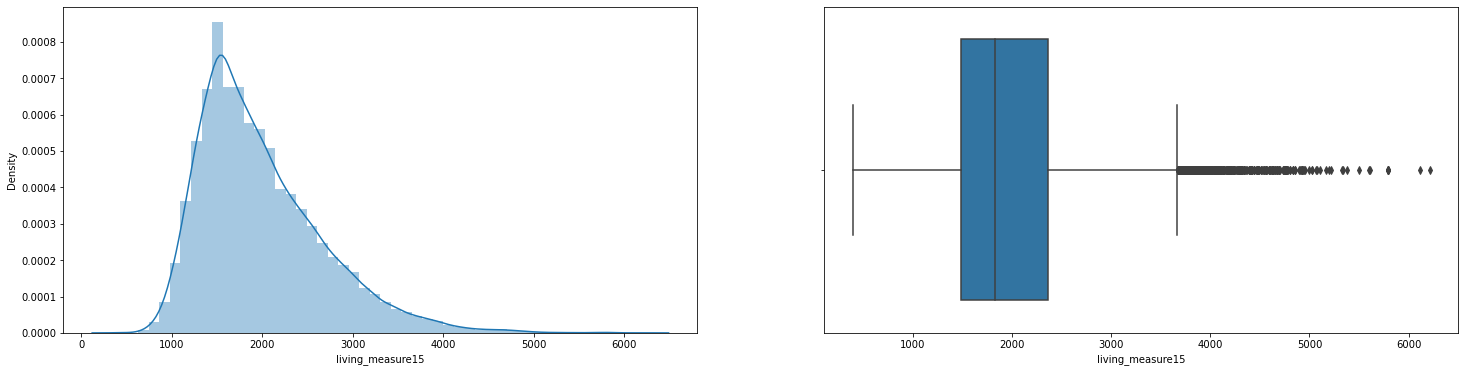

lot_measure15
Skew :  9.525


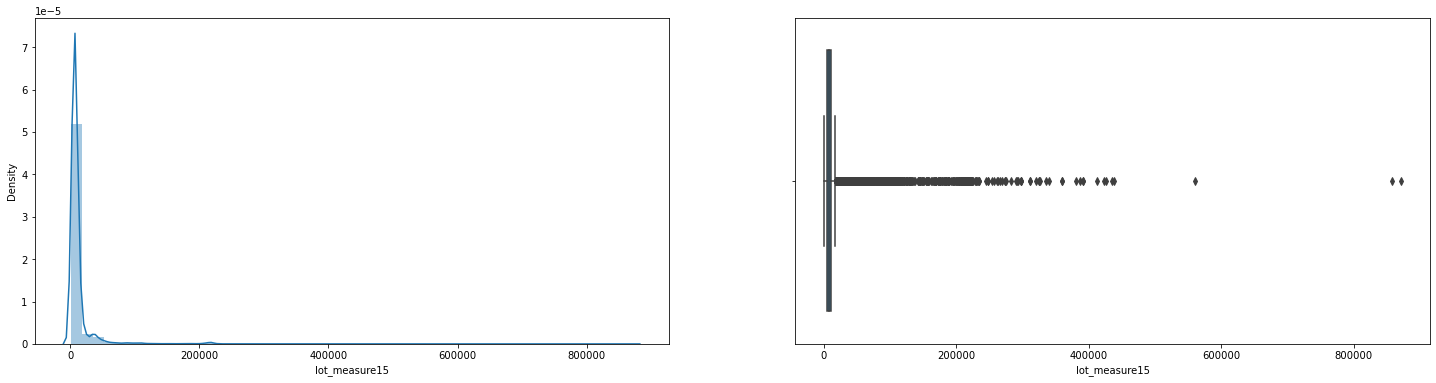

furnished
Skew :  1.528


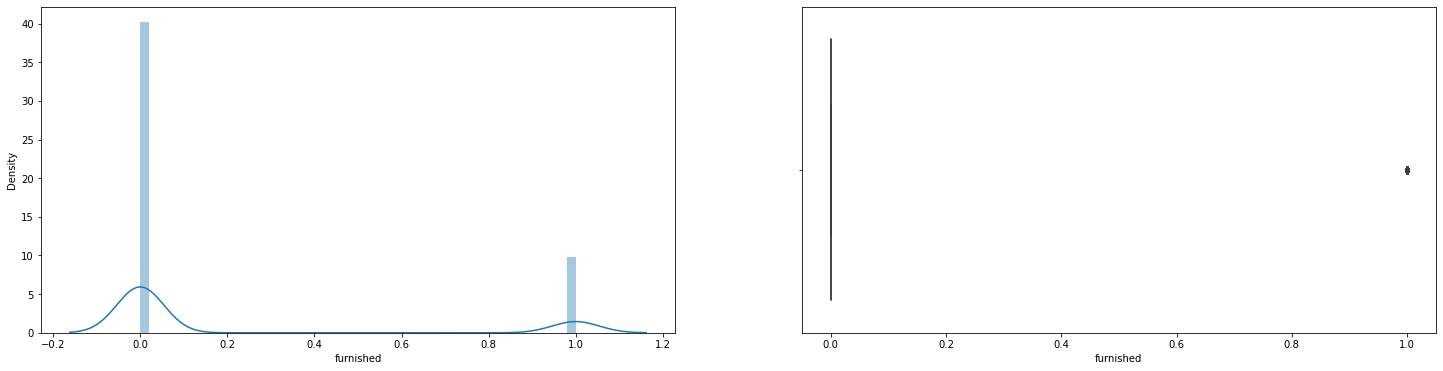

total_area
Skew :  12.972


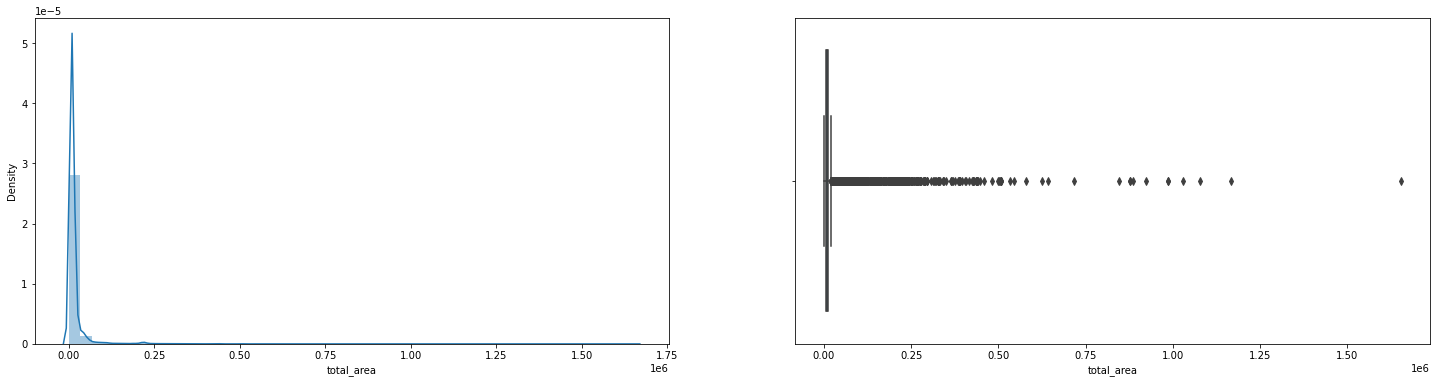

In [134]:
for col in house_df.iloc[:, 2:].columns:
    print(col)
    print('Skew : ', np.round(house_df[col].skew(),3))
    plt.figure(figsize=(25,6))
    plt.subplot(1,2,1)
    sns.distplot(house_df[col])
    plt.subplot(1,2,2)
    sns.boxplot(house_df[col])
    plt.show()

In [135]:
#cid 
cid_count=house_df.cid.value_counts()
cid_count[cid_count>1].shape

(176,)

In [136]:
#we will create new data frame that can be used for modeling
#We will convert the dayhours to 'month_year' as sale month-year is relevant for analysis

house_dfr=house_df.copy()
house_df.dayhours=house_df.dayhours.str.replace('T000000', "")
house_df.dayhours=pd.to_datetime(house_df.dayhours,format='%Y%m%d')
house_df['month_year']=house_df['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
house_df['month_year'].head()

0       April-2015
1       March-2015
2      August-2014
3     October-2014
4    February-2015
Name: month_year, dtype: object

In [137]:
house_df['month_year'].value_counts()

April-2015        2231
July-2014         2211
June-2014         2180
August-2014       1940
October-2014      1878
March-2015        1875
September-2014    1774
May-2014          1768
December-2014     1471
November-2014     1411
February-2015     1250
January-2015       978
May-2015           646
Name: month_year, dtype: int64

In [138]:
house_df.groupby(['month_year'])['price'].agg('mean')

month_year
April-2015        561933.463021
August-2014       536527.039691
December-2014     524602.893270
February-2015     507919.603200
January-2015      525963.251534
July-2014         544892.161013
June-2014         558123.736239
March-2015        544057.683200
May-2014          548166.600113
May-2015          558193.095975
November-2014     522058.861800
October-2014      539127.477636
September-2014    529315.868095
Name: price, dtype: float64

In [139]:
house_df.price.describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

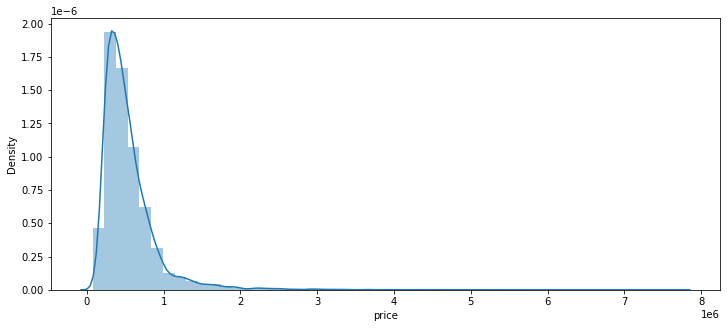

In [140]:
plt.figure(figsize=(12,5))
sns.distplot(house_df['price'])

In [141]:
house_df['room_bed'].value_counts()

3.0     9875
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

In [142]:
house_df[house_df['room_bed']==33]

cid   dayhours     price  room_bed  room_bath  living_measure  \
16913  2.402101e+09 2014-06-25  640000.0      33.0       1.75          1620.0   

       lot_measure  ceil  coast  sight  ...  yr_built  yr_renovated  zipcode  \
16913       6000.0   1.0    0.0    0.0  ...    1947.0           0.0  98103.0   

           lat     long  living_measure15  lot_measure15  furnished  \
16913  47.6878 -122.331            1330.0         4700.0        0.0   

       total_area  month_year  
16913      7620.0   June-2014  

[1 rows x 24 columns]

<AxesSubplot:xlabel='room_bed', ylabel='count'>

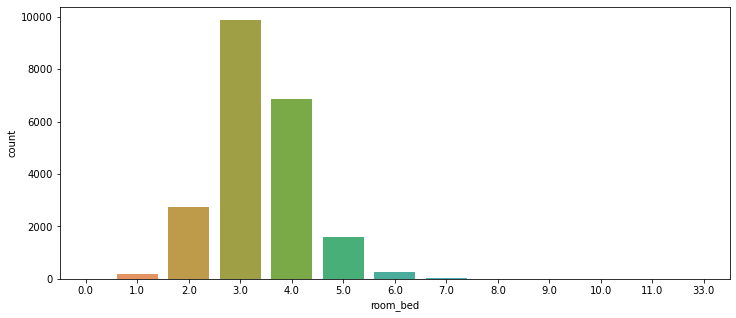

In [143]:
plt.figure(figsize=(12,5))
sns.countplot(house_df.room_bed)

0.00      10
0.50       4
0.75      72
1.00    3829
1.25       9
1.50    1439
1.75    3031
2.00    1917
2.25    2039
2.50    5466
2.75    1178
3.00     750
3.25     588
3.50     726
3.75     155
4.00     135
4.25      78
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: room_bath, dtype: int64

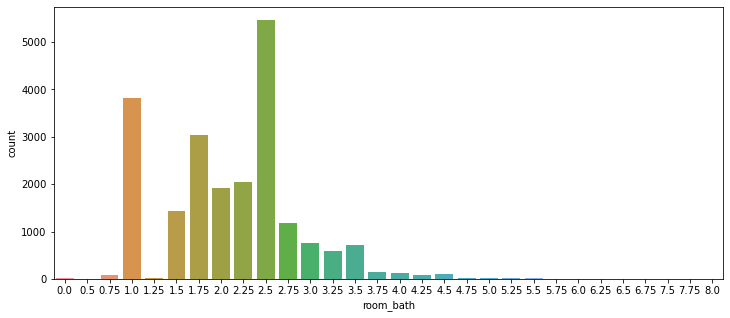

In [144]:
plt.figure(figsize=(12,5))
sns.countplot(house_df.room_bath)
house_df['room_bath'].value_counts().sort_index()

Skewness is : 0.5051364190311984


<AxesSubplot:xlabel='room_bath', ylabel='Density'>

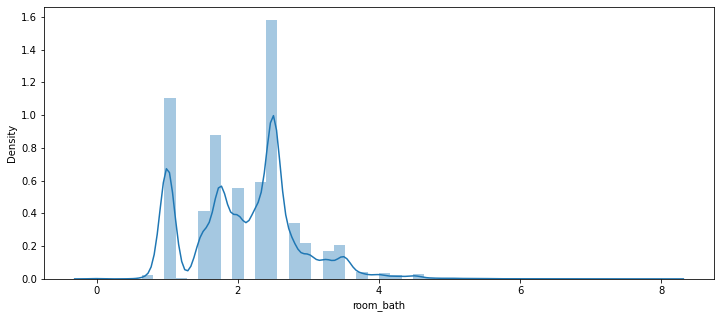

In [145]:
plt.figure(figsize=(12,5))
print("Skewness is :",house_df.room_bath.skew())
sns.distplot(house_df.room_bath)

Skewness is : 1.473414902919285


count    21613.000000
mean      2079.247351
std        918.395090
min        290.000000
25%       1420.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: living_measure, dtype: float64

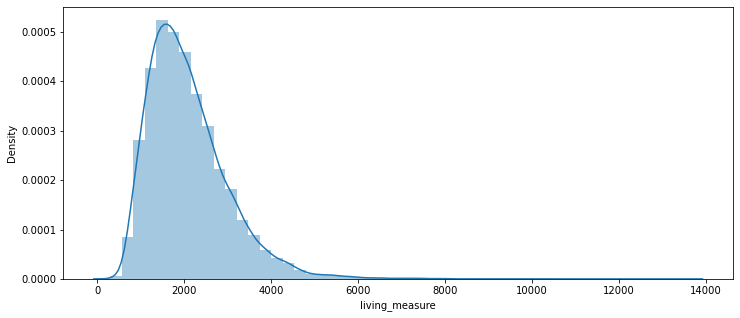

In [146]:
#Data is skewed as visible from plot, as its distribution is normal
plt.figure(figsize=(12,5))
print("Skewness is :",house_df.living_measure.skew())
sns.distplot(house_df.living_measure)
house_df.living_measure.describe()

<AxesSubplot:xlabel='living_measure'>

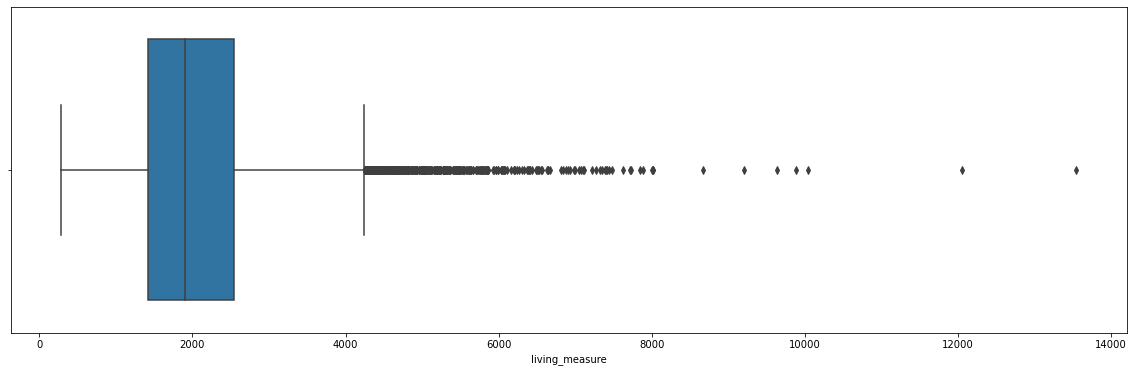

In [147]:
#Let's plot the boxplot for living_measure
plt.figure(figsize=(20,6))
sns.boxplot(house_df.living_measure)

In [148]:
#checking the no. of data points with Living measure greater than 8000
house_df[house_df['living_measure']>8000]

cid   dayhours      price  room_bed  room_bath  \
1068   6.762700e+09 2014-10-13  7700000.0       6.0       8.00   
1245   1.924059e+09 2014-06-17  4670000.0       5.0       6.75   
7928   1.225069e+09 2014-05-05  2280000.0       7.0       8.00   
10639  9.208900e+09 2014-09-19  6890000.0       6.0       7.75   
10718  9.808701e+09 2014-06-11  7060000.0       5.0       4.50   
12794  2.470100e+09 2014-08-04  5570000.0       5.0       5.75   
20038  1.247600e+09 2014-10-20  5110000.0       5.0       5.25   
20193  2.303900e+09 2014-06-11  2890000.0       5.0       6.25   
20746  6.072800e+09 2014-07-02  3300000.0       5.0       6.25   

       living_measure  lot_measure  ceil  coast  sight  ...  yr_built  \
1068          12050.0      27600.0   2.5    0.0    3.0  ...    1910.0   
1245           9640.0      13068.0   1.0    1.0    4.0  ...    1983.0   
7928          13540.0     307752.0   3.0    0.0    4.0  ...    1999.0   
10639          9890.0      31374.0   2.0    0.0    4.0  ...    2001.0   
10718         10040.0      37325.0   2.0    1.0    2.0  ...    1940.0   
12794          9200.0      35069.0   2.0    0.0    0.0  ...    2001.0   
20038          8010.0      45517.0   2.0    1.0    4.0  ...    1999.0   
20193          8670.0      64033.0   2.0    0.0    4.0  ...    1965.0   
20746          8020.0      21738.0   2.0    0.0    0.0  ...    2001.0   

       yr_renovated  zipcode      lat     long  living_measure15  \
1068         1987.0  98102.0  47.6298 -122.323            3940.0   
1245         2009.0  98040.0  47.5570 -122.210            3270.0   
7928            0.0  98053.0  47.6675 -121.986            4850.0   
10639           0.0  98039.0  47.6305 -122.290            4540.0   
10718        2001.0  98004.0  47.6500 -122.214            3930.0   
12794           0.0  98039.0  47.6289 -122.233            3560.0   
20038           0.0  98033.0  47.6767 -122.211            3430.0   
20193        2003.0  98177.0  47.7295 -122.372            4140.0   
20746           0.0  98006.0  47.5675 -122.189            4160.0   

       lot_measure15  furnished  total_area      month_year  
1068          8800.0        1.0     39650.0    October-2014  
1245         10454.0        1.0     22708.0       June-2014  
7928        217800.0        1.0    321292.0        May-2014  
10639        42730.0        1.0     41264.0  September-2014  
10718        25449.0        1.0     47365.0       June-2014  
12794        24345.0        1.0     44269.0     August-2014  
20038        26788.0        1.0     53527.0    October-2014  
20193        81021.0        1.0     72703.0       June-2014  
20746        18969.0        1.0     29758.0       July-2014  

[9 rows x 24 columns]

Skewness is : 13.084208709303645


count    2.161300e+04
mean     1.508495e+04
std      4.138574e+04
min      5.200000e+02
25%      5.032000e+03
50%      7.606000e+03
75%      1.066000e+04
max      1.651359e+06
Name: lot_measure, dtype: float64

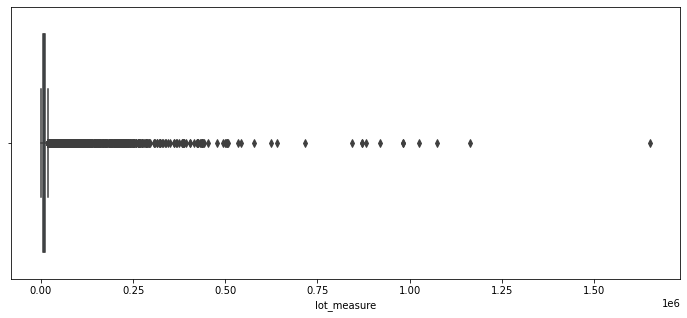

In [150]:
#Data is skewed as visible from plot
plt.figure(figsize=(12,5))
print("Skewness is :",house_df.lot_measure.skew())
sns.boxplot(house_df.lot_measure)
house_df.lot_measure.describe()

In [151]:
#checking the no. of data points with Lot measure greater than 1250000
house_df[house_df['lot_measure']>1250000]

cid   dayhours     price  room_bed  room_bath  living_measure  \
11674  1.020069e+09 2015-03-27  700000.0       4.0        1.0          1300.0   

       lot_measure  ceil  coast  sight  ...  yr_built  yr_renovated  zipcode  \
11674    1651359.0   1.0    0.0    3.0  ...    1920.0           0.0  98022.0   

           lat     long  living_measure15  lot_measure15  furnished  \
11674  47.2313 -122.023            2560.0       425581.0        0.0   

       total_area  month_year  
11674   1652659.0  March-2015  

[1 rows x 24 columns]

In [152]:
#let's see the ceil count for all the records
house_df.ceil.value_counts()

1.0    10719
2.0     8210
1.5     1905
3.0      610
2.5      161
3.5        8
Name: ceil, dtype: int64

<AxesSubplot:xlabel='ceil', ylabel='count'>

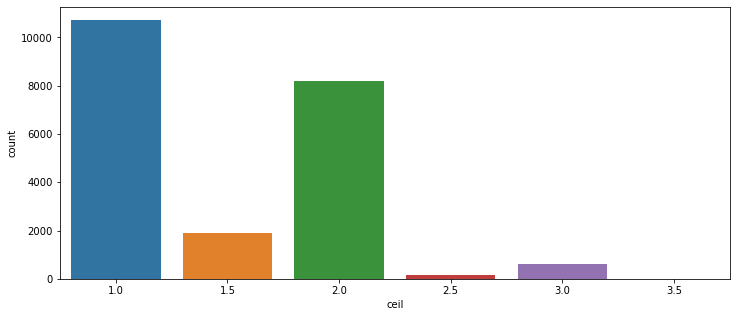

In [153]:
plt.figure(figsize=(12,5))
sns.countplot('ceil',data=house_df)

In [154]:
#coast - most houses donot have waterfront view, very few are waterfront
house_df.coast.value_counts()

0.0    21452
1.0      161
Name: coast, dtype: int64

In [155]:
#sight - most sights have not been viewed
house_df.sight.value_counts()

0.0    19494
2.0      959
3.0      510
1.0      332
4.0      318
Name: sight, dtype: int64

In [156]:
#condition - Overall most houses are rated as 3 and above for its condition overall
house_df.condition.value_counts()

3.0    14063
4.0     5655
5.0     1694
2.0      171
1.0       30
Name: condition, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

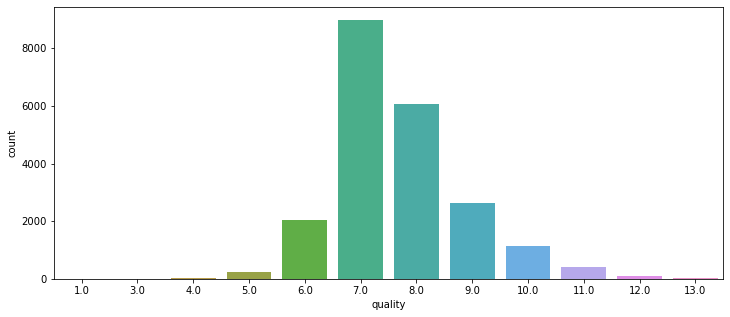

In [157]:
#Quality - most properties have quality rating between 6 to 10
house_df.quality.value_counts()
plt.figure(figsize=(12,5))
sns.countplot('quality',data=house_df)

In [158]:
#checking the no. of data points with quality rating as 13
house_df[house_df['quality']==13]

cid   dayhours      price  room_bed  room_bath  \
388    8.532000e+08 2014-07-01  3800000.0       5.0       5.50   
1068   6.762700e+09 2014-10-13  7700000.0       6.0       8.00   
3271   7.237501e+09 2014-10-10  1780000.0       4.0       3.25   
3649   2.426039e+09 2015-01-30  2420000.0       5.0       4.75   
4371   1.725059e+09 2014-11-20  2390000.0       4.0       4.00   
8420   9.831200e+09 2015-03-04  2480000.0       5.0       3.75   
10639  9.208900e+09 2014-09-19  6890000.0       6.0       7.75   
10832  4.139900e+09 2015-04-20  2340000.0       4.0       2.50   
11459  1.068000e+09 2014-09-23  3200000.0       6.0       5.00   
12794  2.470100e+09 2014-08-04  5570000.0       5.0       5.75   
16985  2.303900e+09 2014-09-11  3800000.0       3.0       4.25   
20193  2.303900e+09 2014-06-11  2890000.0       5.0       6.25   
20547  3.303850e+09 2014-12-12  2980000.0       5.0       5.50   

       living_measure  lot_measure  ceil  coast  sight  ...  yr_built  \
388            7050.0      42840.0   1.0    0.0    2.0  ...    1978.0   
1068          12050.0      27600.0   2.5    0.0    3.0  ...    1910.0   
3271           4890.0      13402.0   2.0    0.0    0.0  ...    2004.0   
3649           7880.0      24250.0   2.0    0.0    2.0  ...    1996.0   
4371           6330.0      13296.0   2.0    0.0    2.0  ...    2000.0   
8420           6810.0       7500.0   2.5    0.0    0.0  ...    1922.0   
10639          9890.0      31374.0   2.0    0.0    4.0  ...    2001.0   
10832          4500.0      35200.0   1.0    0.0    0.0  ...    1988.0   
11459          7100.0      18200.0   2.5    0.0    0.0  ...    1933.0   
12794          9200.0      35069.0   2.0    0.0    0.0  ...    2001.0   
16985          5510.0      35000.0   2.0    0.0    4.0  ...    1997.0   
20193          8670.0      64033.0   2.0    0.0    4.0  ...    1965.0   
20547          7400.0      18898.0   2.0    0.0    3.0  ...    2001.0   

       yr_renovated  zipcode      lat     long  living_measure15  \
388             0.0  98004.0  47.6229 -122.220            5070.0   
1068         1987.0  98102.0  47.6298 -122.323            3940.0   
3271            0.0  98059.0  47.5303 -122.131            5790.0   
3649            0.0  98177.0  47.7334 -122.362            2740.0   
4371            0.0  98033.0  47.6488 -122.201            2200.0   
8420            0.0  98102.0  47.6285 -122.322            2660.0   
10639           0.0  98039.0  47.6305 -122.290            4540.0   
10832           0.0  98006.0  47.5477 -122.126            4760.0   
11459        2002.0  98199.0  47.6427 -122.408            3130.0   
12794           0.0  98039.0  47.6289 -122.233            3560.0   
16985           0.0  98177.0  47.7296 -122.370            3430.0   
20193        2003.0  98177.0  47.7295 -122.372            4140.0   
20547           0.0  98006.0  47.5431 -122.112            6110.0   

       lot_measure15  furnished  total_area      month_year  
388          20570.0        1.0     49890.0       July-2014  
1068          8800.0        1.0     39650.0    October-2014  
3271         13539.0        1.0     18292.0    October-2014  
3649         10761.0        1.0     32130.0    January-2015  
4371          9196.0        1.0     19626.0   November-2014  
8420          7500.0        1.0     14310.0      March-2015  
10639        42730.0        1.0     41264.0  September-2014  
10832        35200.0        1.0     39700.0      April-2015  
11459         6477.0        1.0     25300.0  September-2014  
12794        24345.0        1.0     44269.0     August-2014  
16985        45302.0        1.0     40510.0  September-2014  
20193        81021.0        1.0     72703.0       June-2014  
20547        26442.0        1.0     26298.0   December-2014  

[13 rows x 24 columns]

Skewness is : 1.4468176475402241


count    21613.000000
mean      1788.343960
std        828.090039
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: ceil_measure, dtype: float64

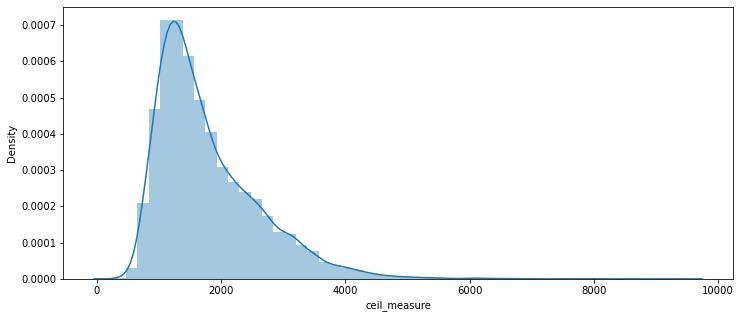

In [160]:
#ceil_measure - its highly skewed
print("Skewness is :", house_df.ceil_measure.skew())
plt.figure(figsize=(12,5))
sns.distplot(house_df.ceil_measure)
house_df.ceil_measure.describe()

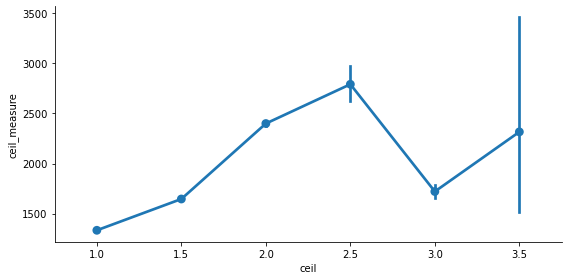

In [161]:
sns.factorplot(x='ceil',y='ceil_measure',data=house_df, size = 4, aspect = 2)

<AxesSubplot:xlabel='basement', ylabel='Density'>

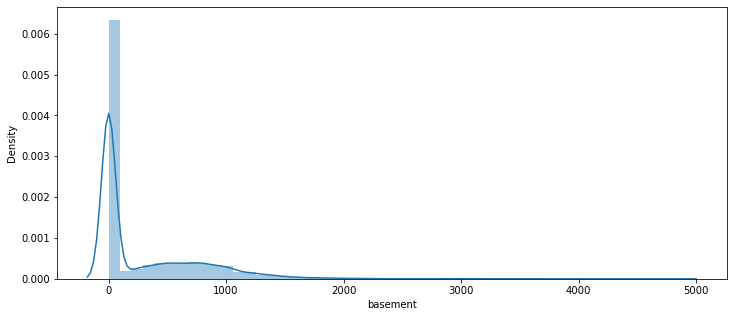

In [162]:
#basement_measure
plt.figure(figsize=(12,5))
sns.distplot(house_df.basement)

In [163]:
house_df[house_df.basement==0].shape

(13126, 24)

<AxesSubplot:xlabel='basement'>

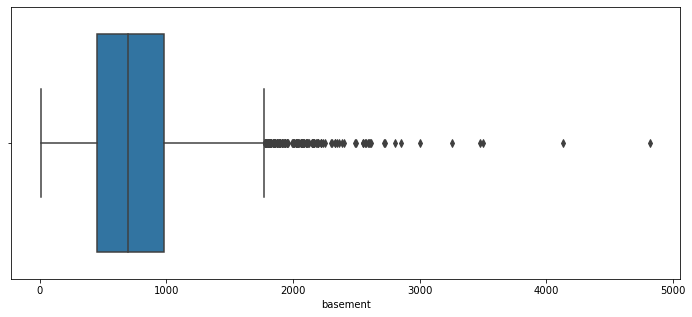

In [165]:
#houses have zero measure of basement i.e. they donot have basements
#let's plot boxplot for properties which have basements only
house_df_base=house_df[house_df['basement']>0]
plt.figure(figsize=(12,5))
sns.boxplot(house_df_base['basement'])

In [166]:
#checking the no. of data points with 'basement' greater than 4000
house_df[house_df['basement']>4000]

cid   dayhours      price  room_bed  room_bath  living_measure  \
1245  1.924059e+09 2014-06-17  4670000.0       5.0       6.75          9640.0   
7928  1.225069e+09 2014-05-05  2280000.0       7.0       8.00         13540.0   

      lot_measure  ceil  coast  sight  ...  yr_built  yr_renovated  zipcode  \
1245      13068.0   1.0    1.0    4.0  ...    1983.0        2009.0  98040.0   
7928     307752.0   3.0    0.0    4.0  ...    1999.0           0.0  98053.0   

          lat     long  living_measure15  lot_measure15  furnished  \
1245  47.5570 -122.210            3270.0        10454.0        1.0   
7928  47.6675 -121.986            4850.0       217800.0        1.0   

      total_area  month_year  
1245     22708.0   June-2014  
7928    321292.0    May-2014  

[2 rows x 24 columns]

<AxesSubplot:xlabel='basement', ylabel='Density'>

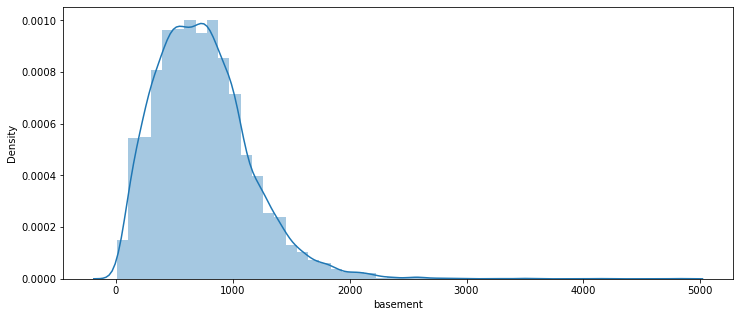

In [167]:
#Distribution of houses having basement
plt.figure(figsize=(12,5))
sns.distplot(house_df_base.basement)

<AxesSubplot:xlabel='yr_built', ylabel='Density'>

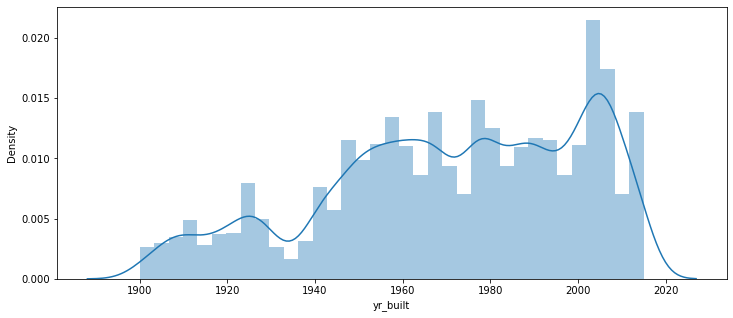

In [168]:
#house range from new to very old
plt.figure(figsize=(12,5))
sns.distplot(house_df.yr_built)

In [169]:
house_df[house_df['yr_renovated']>0].shape

(914, 24)

<AxesSubplot:xlabel='yr_renovated', ylabel='Density'>

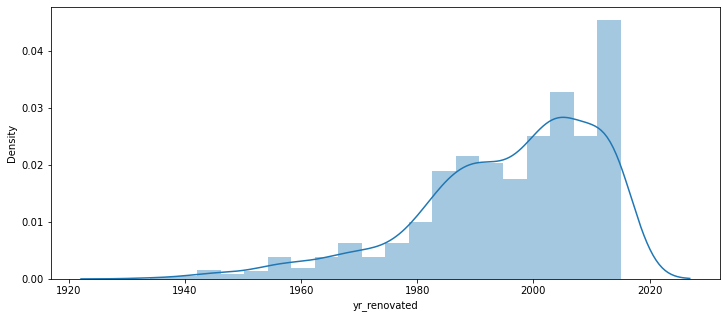

In [170]:
#yr_renovated - plot of houses which are renovated
house_df_reno=house_df[house_df['yr_renovated']>0]
plt.figure(figsize=(12,5))
sns.distplot(house_df_reno.yr_renovated)

In [171]:
import plotly.express as px

In [173]:
fig = px.scatter_geo(house_df,lat='lat',lon='long')

0.0    17367
1.0     4246
Name: furnished, dtype: int64

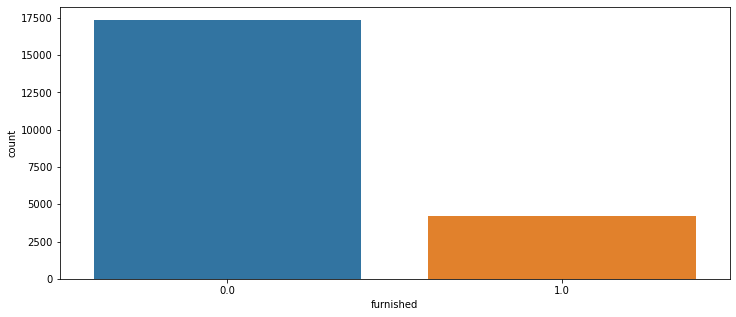

In [177]:
plt.figure(figsize=(12,5))
sns.countplot('furnished',data=house_df)
house_df.furnished.value_counts()

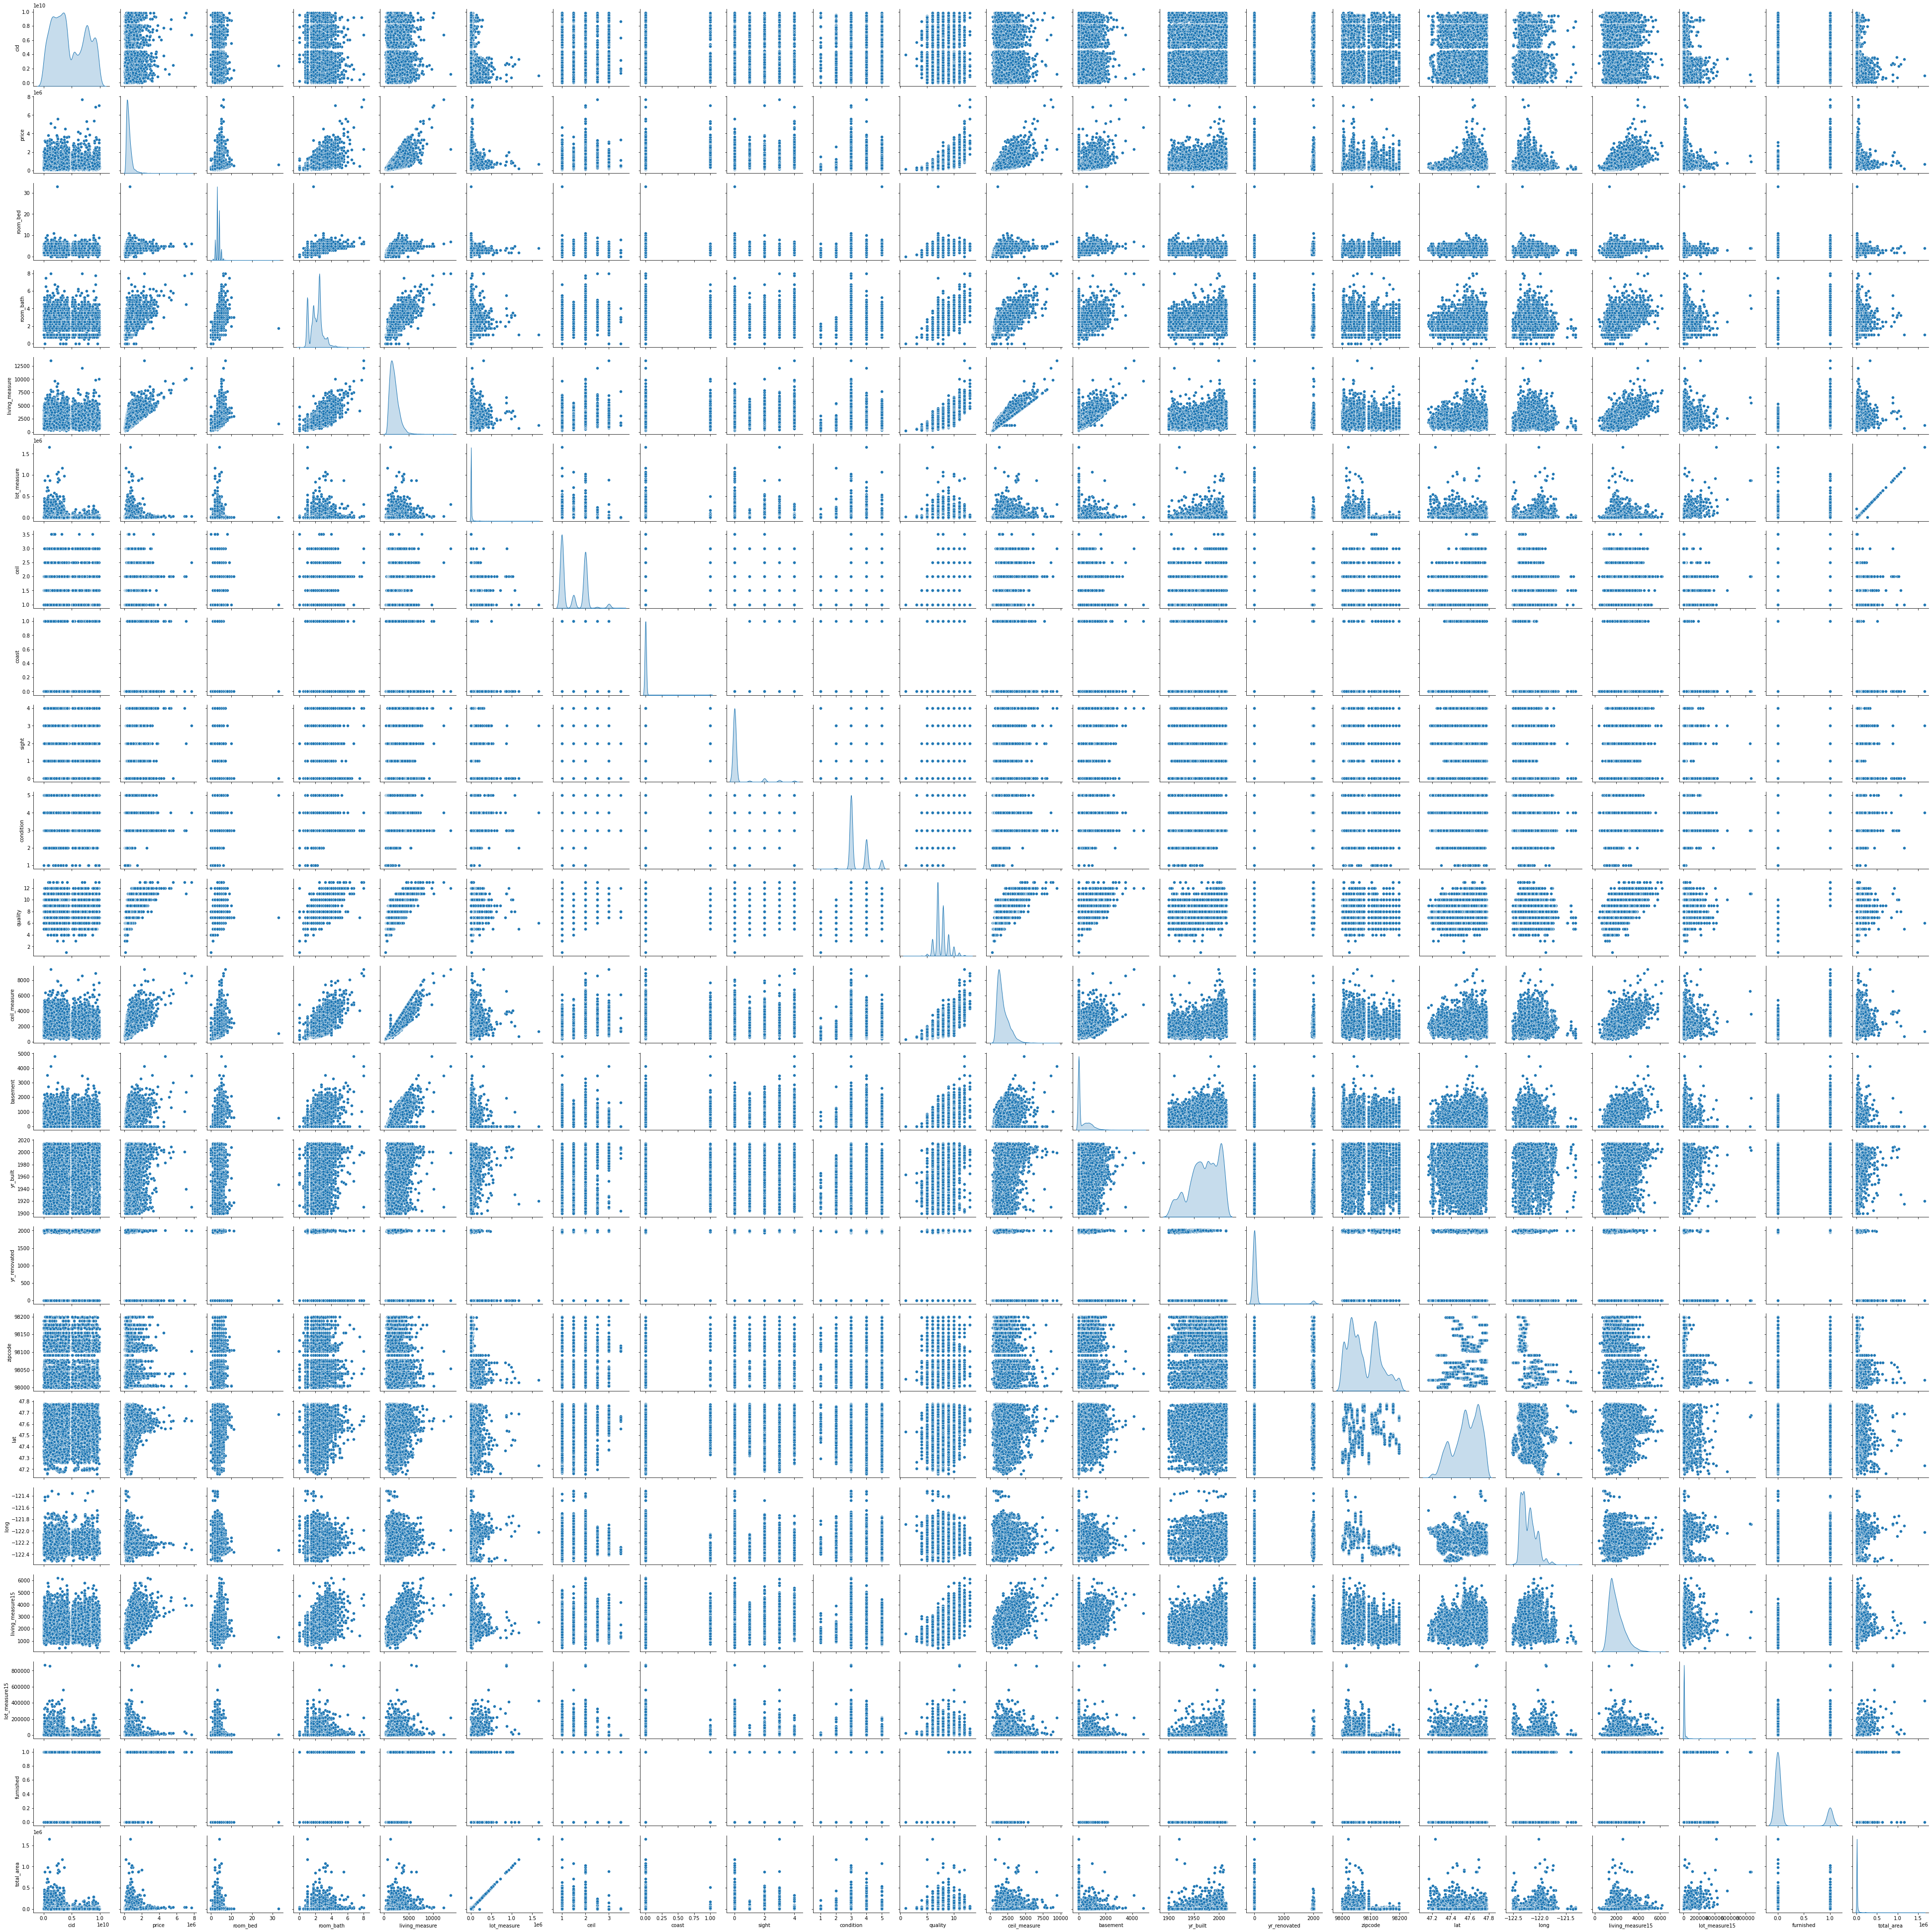

In [178]:
# let's plot all the variables and confirm our above deduction with more confidence
sns.pairplot(house_df, diag_kind = 'kde')

In [179]:
# let's see corelatoin between the different features
house_corr = house_df.corr(method ='pearson')
house_corr

cid     price  room_bed  room_bath  living_measure  \
cid               1.000000 -0.016797  0.001492   0.005991       -0.012240   
price            -0.016797  1.000000  0.307766   0.524081        0.701913   
room_bed          0.001492  0.307766  1.000000   0.514256        0.575828   
room_bath         0.005991  0.524081  0.514256   1.000000        0.752058   
living_measure   -0.012240  0.701913  0.575828   0.752058        1.000000   
lot_measure      -0.131747  0.089681  0.032011   0.087566        0.172689   
ceil              0.019379  0.256385  0.174115   0.496180        0.352734   
coast            -0.004184  0.266042 -0.006080   0.061872        0.102560   
sight             0.011776  0.396999  0.078215   0.185854        0.284288   
condition        -0.024273  0.035556  0.027836  -0.126503       -0.059032   
quality           0.008159  0.667482  0.356037   0.663313        0.762179   
ceil_measure     -0.010801  0.605599  0.476983   0.683493        0.876075   
basement         -0.005151  0.323837  0.301896   0.282460        0.434640   
yr_built          0.021586  0.053541  0.153670   0.504725        0.317159   
yr_renovated     -0.016907  0.126442  0.018437   0.050342        0.055154   
zipcode          -0.008224 -0.053168 -0.152556  -0.203312       -0.199577   
lat              -0.001891  0.306919 -0.009410   0.024818        0.052659   
long              0.020888  0.021199  0.129406   0.221594        0.239967   
living_measure15 -0.003687  0.583086  0.389903   0.563913        0.752584   
lot_measure15    -0.138713  0.082604  0.029401   0.086683        0.183499   
furnished        -0.010099  0.565834  0.258431   0.483371        0.632137   
total_area       -0.131665  0.104858  0.044477   0.103792        0.194146   

                  lot_measure      ceil     coast     sight  condition  ...  \
cid                 -0.131747  0.019379 -0.004184  0.011776  -0.024273  ...   
price                0.089681  0.256385  0.266042  0.396999   0.035556  ...   
room_bed             0.032011  0.174115 -0.006080  0.078215   0.027836  ...   
room_bath            0.087566  0.496180  0.061872  0.185854  -0.126503  ...   
living_measure       0.172689  0.352734  0.102560  0.284288  -0.059032  ...   
lot_measure          1.000000 -0.005297  0.021143  0.074968  -0.008531  ...   
ceil                -0.005297  1.000000  0.024136  0.028945  -0.262111  ...   
coast                0.021143  0.024136  1.000000  0.400220   0.017683  ...   
sight                0.074968  0.028945  0.400220  1.000000   0.046519  ...   
condition           -0.008531 -0.262111  0.017683  0.046519   1.000000  ...   
quality              0.113851  0.457346  0.082515  0.250867  -0.144749  ...   
ceil_measure         0.183409  0.522225  0.071331  0.167396  -0.158318  ...   
basement             0.015358 -0.244864  0.079239  0.277243   0.173736  ...   
yr_built             0.052734  0.486468 -0.025917 -0.052804  -0.360446  ...   
yr_renovated         0.007639  0.005351  0.088358  0.102980  -0.060494  ...   
zipcode             -0.129231 -0.058419  0.030289  0.084386   0.003040  ...   
lat                 -0.085902  0.050372 -0.014139  0.006001  -0.015471  ...   
long                 0.228888  0.125028 -0.041954 -0.078190  -0.106690  ...   
living_measure15     0.144837  0.277406  0.086388  0.281213  -0.091782  ...   
lot_measure15        0.715986 -0.011386  0.030738  0.073016  -0.002926  ...   
furnished            0.119182  0.347236  0.069571  0.219898  -0.122410  ...   
total_area           0.998042  0.002384  0.023399  0.080993  -0.009714  ...   

                  basement  yr_built  yr_renovated   zipcode       lat  \
cid              -0.005151  0.021586     -0.016907 -0.008224 -0.001891   
price             0.323837  0.053541      0.126442 -0.053168  0.306919   
room_bed          0.301896  0.153670      0.018437 -0.152556 -0.009410   
room_bath         0.282460  0.504725      0.050342 -0.203312  0.024818   
living_measure    0.434640  0.317159      0.055154 -0.199577  0

<AxesSubplot:>

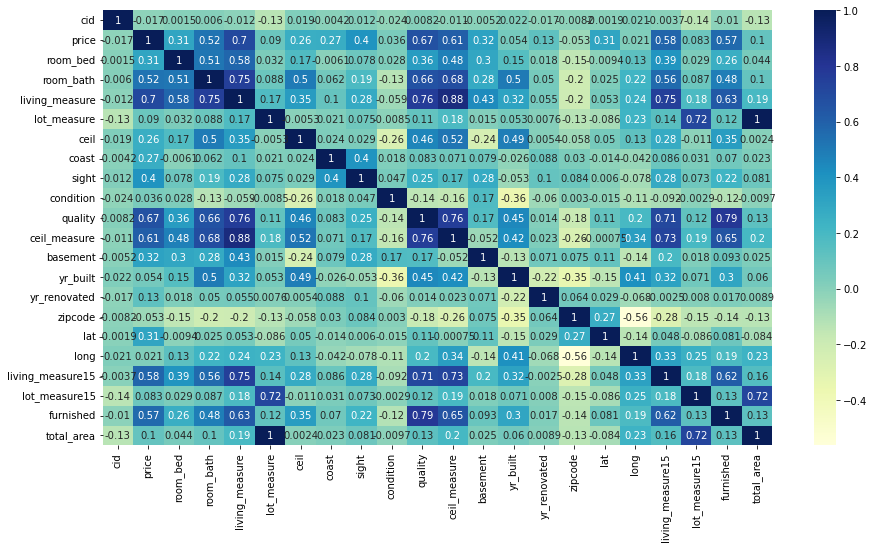

In [180]:
# Plotting heatmap
plt.subplots(figsize =(15, 8)) 
sns.heatmap(house_corr,cmap="YlGnBu",annot=True)

mean    median  size
month_year                                   
April-2015      561933.463021  476500.0  2231
August-2014     536527.039691  442100.0  1940
December-2014   524602.893270  432500.0  1471
February-2015   507919.603200  425545.0  1250
January-2015    525963.251534  438500.0   978
July-2014       544892.161013  465000.0  2211
June-2014       558123.736239  465000.0  2180
March-2015      544057.683200  450000.0  1875
May-2014        548166.600113  465000.0  1768
May-2015        558193.095975  455000.0   646
November-2014   522058.861800  435000.0  1411
October-2014    539127.477636  446900.0  1878
September-2014  529315.868095  450000.0  1774

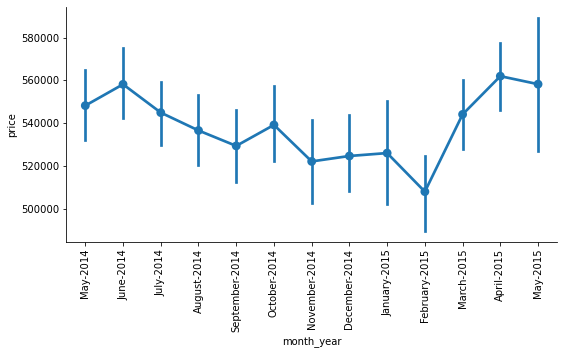

In [181]:
#month,year in which house is sold. Price is not influenced by it, though there are outliers and can be easily seen.
house_df['month_year'] = pd.to_datetime(house_df['month_year'], format='%B-%Y')

house_df.sort_values(["month_year"], axis=0,ascending=True, inplace=True) 
house_df["month_year"] = house_df["month_year"].dt.strftime('%B-%Y')

sns.factorplot(x='month_year',y='price',data=house_df, size=4, aspect=2)
plt.xticks(rotation=90)
#groupby
house_df.groupby('month_year')['price'].agg(['mean','median','size'])

mean    median  size
room_bed                              
0.0       4.102231e+05  288000.0    13
1.0       3.189286e+05  299000.0   197
2.0       4.013572e+05  373500.0  2747
3.0       4.667563e+05  414500.0  9875
4.0       6.357284e+05  549950.0  6854
5.0       7.867329e+05  619000.0  1595
6.0       8.274895e+05  652500.0   270
7.0       9.514478e+05  728580.0    38
8.0       1.105077e+06  700000.0    13
9.0       8.939998e+05  817000.0     6
10.0      8.200000e+05  660000.0     3
11.0      5.200000e+05  520000.0     1
33.0      6.400000e+05  640000.0     1

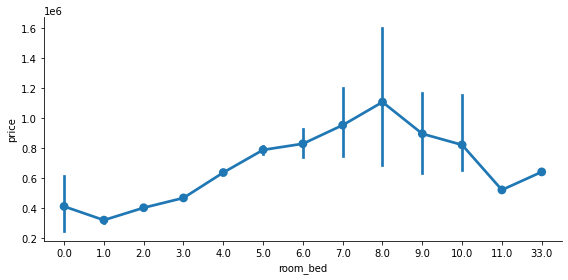

In [182]:
#Room_bed - outliers can be seen easily. Mean and median of price increases with number bedrooms/house uptill a point
#and then drops
sns.factorplot(x='room_bed',y='price',data=house_df, size=4, aspect=2)

#groupby
house_df.groupby('room_bed')['price'].agg(['mean','median','size'])

mean     median  size
room_bath                               
0.00       4.490950e+05   317500.0    10
0.50       2.373750e+05   264000.0     4
0.75       2.945209e+05   273500.0    72
1.00       3.470889e+05   320000.0  3829
1.25       6.217722e+05   516500.0     9
1.50       4.091834e+05   370000.0  1439
1.75       4.549409e+05   422800.0  3031
2.00       4.575184e+05   422500.0  1917
2.25       5.337925e+05   472500.0  2039
2.50       5.527632e+05   499330.0  5466
2.75       6.605538e+05   605000.0  1178
3.00       7.087325e+05   600000.0   750
3.25       9.710299e+05   837352.0   588
3.50       9.329520e+05   823250.0   726
3.75       1.198179e+06  1070000.0   155
4.00       1.271616e+06  1060000.0   135
4.25       1.535072e+06  1390000.0    78
4.50       1.334211e+06  1060000.0   100
4.75       2.022300e+06  2300000.0    23
5.00       1.674167e+06  1430000.0    21
5.25       1.817962e+06  1420000.0    13
5.50       2.522500e+06  2340000.0    10
5.75       2.492500e+06  1930000.0     4
6.00       2.948333e+06  2895000.0     6
6.25       3.095000e+06  3095000.0     2
6.50       1.710000e+06  1710000.0     2
6.75       2.735000e+06  2735000.0     2
7.50       4.500000e+05   450000.0     1
7.75       6.890000e+06  6890000.0     1
8.00       4.990000e+06  4990000.0     2

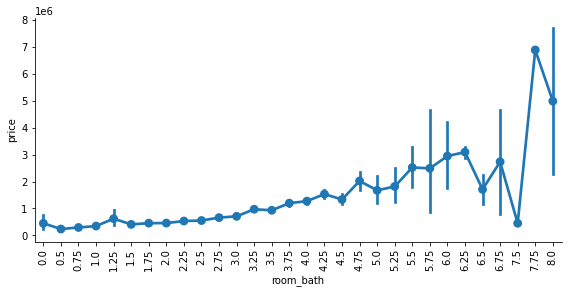

In [183]:
#room_bath - outliers can be seen easily. Overall mean and median price increares with increasing room_bath
sns.factorplot(x='room_bath',y='price',data=house_df,size=4, aspect=2)
plt.xticks(rotation=90)
#groupby
house_df.groupby('room_bath')['price'].agg(['mean','median','size'])

AxesSubplot(0.125,0.125;0.775x0.755)


count    21613.000000
mean      2079.247351
std        918.395090
min        290.000000
25%       1420.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: living_measure, dtype: float64

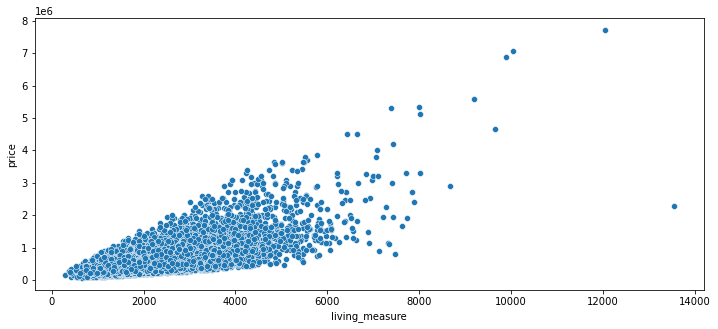

In [185]:
#living_measure - price increases with increase in living measure
plt.figure(figsize=(12,5))
print(sns.scatterplot(house_df['living_measure'],house_df['price']))
house_df['living_measure'].describe()

AxesSubplot(0.125,0.125;0.775x0.755)


count    2.161300e+04
mean     1.508495e+04
std      4.138574e+04
min      5.200000e+02
25%      5.032000e+03
50%      7.606000e+03
75%      1.066000e+04
max      1.651359e+06
Name: lot_measure, dtype: float64

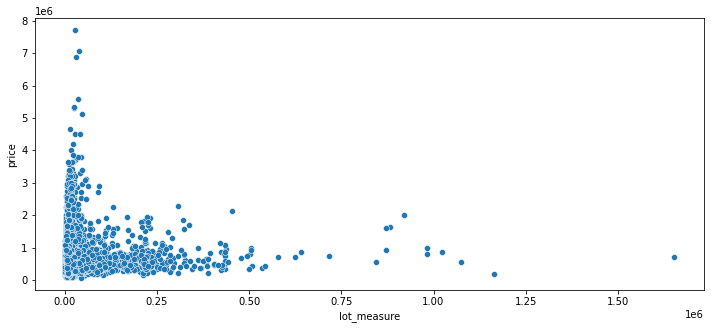

In [186]:
#lot_measure - there seems to be no relation between lot_measure and price
#lot_measure - data value range is very large so breaking it get better view.
plt.figure(figsize=(12,5))
print(sns.scatterplot(house_df['lot_measure'],house_df['price']))
house_df['lot_measure'].describe()

AxesSubplot(0.125,0.125;0.775x0.755)


count    19717.000000
mean      7755.018106
std       4247.414149
min        520.000000
25%       5000.000000
50%       7250.000000
75%       9612.000000
max      24969.000000
Name: lot_measure, dtype: float64

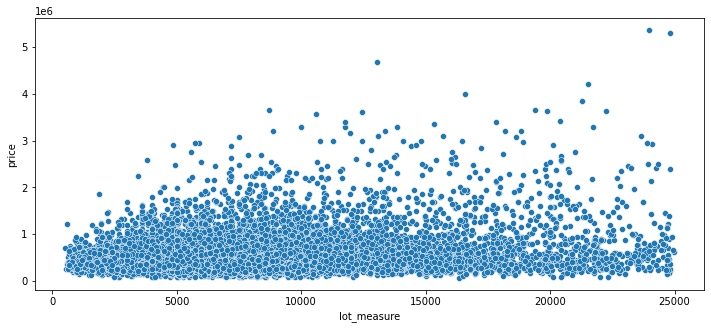

In [187]:
#lot_measure <25000
plt.figure(figsize=(12,5))
x=house_df[house_df['lot_measure']<25000]
print(sns.scatterplot(x['lot_measure'],x['price']))
x['lot_measure'].describe()

AxesSubplot(0.125,0.125;0.775x0.755)


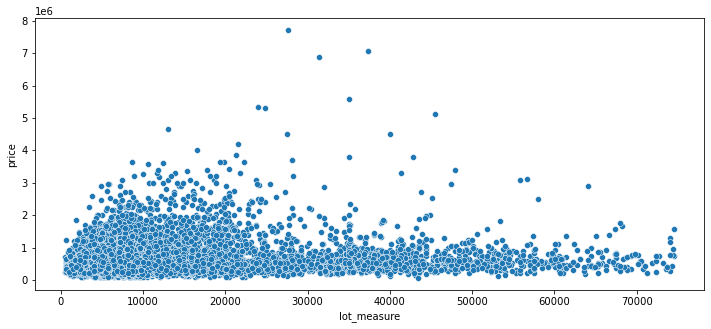

In [188]:
#lot_measure >100000 - price increases with increase in living measure
plt.figure(figsize=(12,5))
y=house_df[house_df['lot_measure']<=75000]
print(sns.scatterplot(y['lot_measure'],y['price']))

mean    median   size
ceil                               
1.0   4.427711e+05  390000.0  10719
1.5   5.593744e+05  525000.0   1905
2.0   6.491210e+05  543250.0   8210
2.5   1.061021e+06  799200.0    161
3.0   5.831248e+05  490500.0    610
3.5   9.339375e+05  534500.0      8

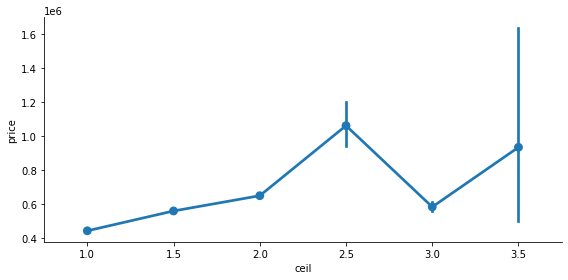

In [189]:
#ceil - median price increases initially and then falls
print(sns.factorplot(x='ceil',y='price',data=house_df, size = 4, aspect = 2))
#groupby
house_df.groupby('ceil')['price'].agg(['mean','median','size'])

living_measure                   price              
              median         mean     median          mean
coast                                                     
0.0           1910.0  2071.087638   450000.0  5.317155e+05
1.0           2830.0  3166.465839  1410000.0  1.668301e+06

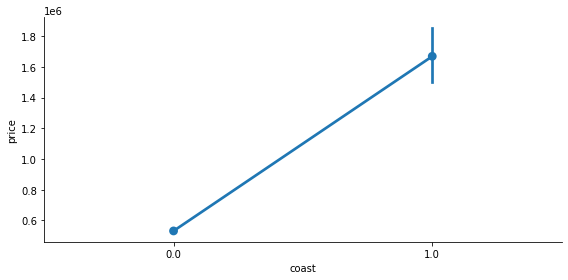

In [190]:
#coast - mean and median of waterfront view is high however such houses are very small in compare to non-waterfront
#Also, living_measure mean and median is greater for waterfront house.
print(sns.factorplot(x='coast',y='price',data=house_df, size = 4, aspect = 2))
#groupby
house_df.groupby('coast')['living_measure','price'].agg(['median','mean'])

price                   living_measure               
               mean     median   size           mean  median   size
sight                                                              
0.0    4.967417e+05   432500.0  19494    1997.373910  1850.0  19494
1.0    8.125186e+05   690944.0    332    2568.960843  2420.0    332
2.0    7.918609e+05   675000.0    959    2651.608968  2450.0    959
3.0    9.724684e+05   802500.0    510    3018.564706  2840.0    510
4.0    1.466554e+06  1190000.0    318    3354.433962  3070.0    318

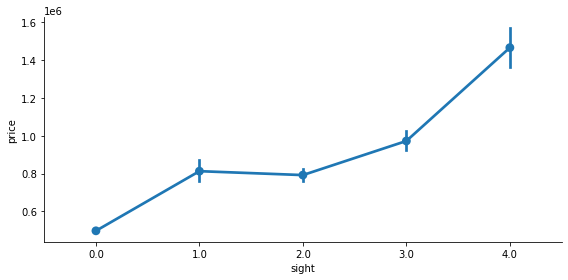

In [191]:
#sight - have outliers. The house sighted more have high price (mean and median) and have large living area as well.
print(sns.factorplot(x='sight',y='price',data=house_df, size = 4, aspect = 2))
#groupby
house_df.groupby('sight')['price','living_measure'].agg(['mean','median','size'])

AxesSubplot(0.125,0.125;0.775x0.755)


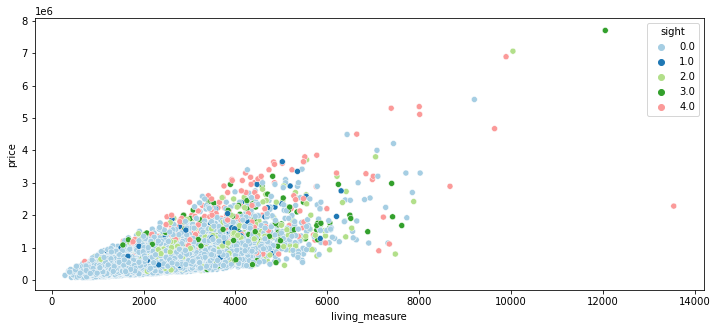

In [193]:
#Sight - Viewed in relation with price and living_measure
#Costlier houses with large living area are sighted more.
plt.figure(figsize=(12,5))
print(sns.scatterplot(house_df['living_measure'],house_df['price'],hue=house_df['sight'],palette='Paired',legend='full'))

price                  living_measure               
                    mean    median   size           mean  median   size
condition                                                              
1.0        334431.666667  262500.0     30    1216.000000  1000.0     30
2.0        326423.327485  279000.0    171    1414.152047  1330.0    171
3.0        542364.148048  451000.0  14063    2148.182394  1970.0  14063
4.0        520643.219275  440000.0   5655    1949.705040  1820.0   5655
5.0        612515.489965  525444.0   1694    2021.842975  1880.0   1694

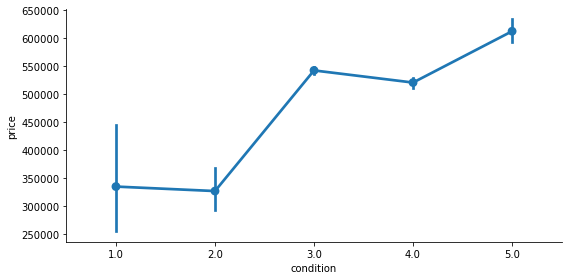

In [194]:
#condition - as the condition rating increases its price and living measure mean and median also increases.
print(sns.factorplot(x='condition',y='price',data=house_df, size = 4, aspect = 2))
#groupby
house_df.groupby('condition')['price','living_measure'].agg(['mean','median','size'])

AxesSubplot(0.125,0.125;0.775x0.755)


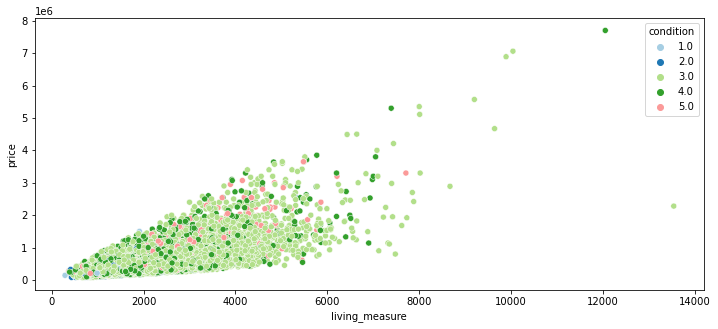

In [196]:
#Condition - Viewed in relation with price and living_measure. Most houses are rated as 3 or more. 
#We can see some outliers as well
plt.figure(figsize=(12,5))
print(sns.scatterplot(house_df['living_measure'],house_df['price'],hue=house_df['condition'],palette='Paired',legend='full'))

price                  living_measure              
                 mean     median  size           mean  median  size
quality                                                            
1.0      1.420000e+05   142000.0     1     290.000000   290.0     1
3.0      2.056667e+05   262000.0     3     596.666667   600.0     3
4.0      2.143810e+05   205000.0    29     660.482759   660.0    29
5.0      2.485240e+05   228700.0   242     983.326446   905.0   242
6.0      3.019166e+05   275276.5  2038    1191.796860  1120.0  2038
7.0      4.025850e+05   375000.0  8982    1689.456134  1630.0  8982
8.0      5.429310e+05   510000.0  6067    2183.522993  2150.0  6067
9.0      7.737382e+05   720000.0  2615    2865.405736  2820.0  2615
10.0     1.072347e+06   914327.0  1134    3520.299824  3450.0  1134
11.0     1.497792e+06  1280000.0   399    4395.448622  4260.0   399
12.0     2.192500e+06  1820000.0    90    5471.588889  4965.0    90
13.0     3.710769e+06  2980000.0    13    7483.076923  7100.0    13

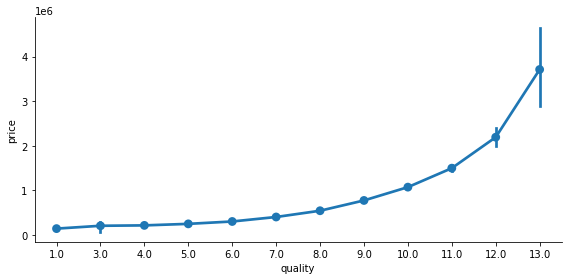

In [197]:
#quality - with grade increase price and living_measure increase (mean and median)

print(sns.factorplot(x='quality',y='price',data=house_df, size = 4, aspect = 2))
#groupby
house_df.groupby('quality')['price','living_measure'].agg(['mean','median','size'])

AxesSubplot(0.125,0.125;0.775x0.755)


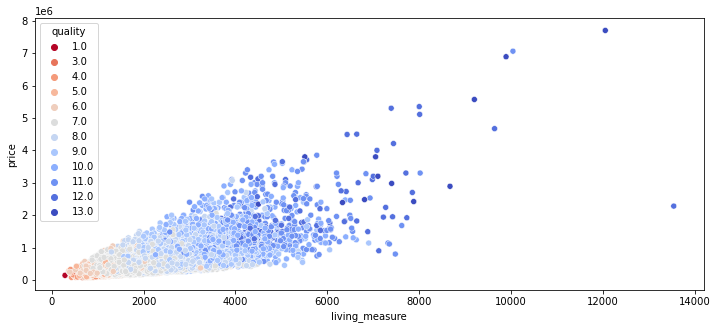

In [198]:
#quality - Viewed in relation with price and living_measure. Most houses are graded as 6 or more. 
#We can see some outliers as well
plt.figure(figsize=(12,5))
print(sns.scatterplot(house_df['living_measure'],house_df['price'],hue=house_df['quality'],palette='coolwarm_r',
                      legend='full'))

AxesSubplot(0.125,0.125;0.775x0.755)


count    21613.000000
mean      1788.343960
std        828.090039
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: ceil_measure, dtype: float64

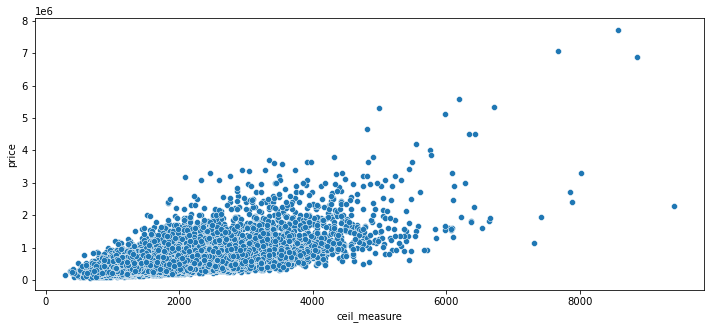

In [200]:
#ceil_measure - price increases with increase in ceil measure
plt.figure(figsize=(12,5))
print(sns.scatterplot(house_df['ceil_measure'],house_df['price']))
house_df['ceil_measure'].describe()

AxesSubplot(0.125,0.125;0.775x0.755)


count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: basement, dtype: float64

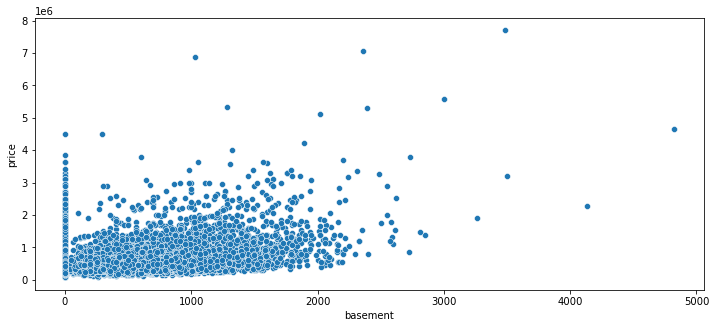

In [201]:
#basement - price increases with increase in ceil measure
plt.figure(figsize=(12,5))
print(sns.scatterplot(house_df['basement'],house_df['price']))
house_df['basement'].describe()

In [202]:
#Basement to analyse data
def create_basement_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"   
house_df['has_basement'] = house_df['basement'].apply(create_basement_group)

In [203]:
house_df

cid   dayhours     price  room_bed  room_bath  living_measure  \
12235  1.425059e+09 2014-05-07  460000.0       3.0       2.00          1760.0   
14791  7.942601e+09 2014-05-20  345600.0       5.0       3.50          2800.0   
1742   5.652600e+09 2014-05-02  750000.0       3.0       1.75          2240.0   
17829  3.529200e+09 2014-05-14  325000.0       3.0       2.50          2220.0   
14810  5.631501e+09 2014-05-15  390000.0       3.0       2.50          2240.0   
...             ...        ...       ...       ...        ...             ...   
3495   6.324000e+09 2015-05-11  210000.0       2.0       1.00           990.0   
13781  6.189200e+09 2015-05-04  617450.0       3.0       2.50          1580.0   
9980   5.710500e+09 2015-05-06  545000.0       3.0       2.00          1900.0   
3462   7.702601e+09 2015-05-05  603000.0       4.0       3.50          3610.0   
6682   8.699100e+09 2015-05-05  370000.0       6.0       2.75          3240.0   

       lot_measure  ceil  coast  sight  ...  yr_renovated  zipcode      lat  \
12235       9055.0   2.0    0.0    0.0  ...           0.0  98052.0  47.6534   
14791       5120.0   2.5    0.0    0.0  ...        2005.0  98122.0  47.6059   
1742       10578.0   2.0    0.0    0.0  ...           0.0  98115.0  47.6954   
17829       6049.0   2.0    0.0    0.0  ...           0.0  98031.0  47.3972   
14810      10800.0   2.0    0.0    0.0  ...           0.0  98028.0  47.7433   
...            ...   ...    ...    ...  ...           ...      ...      ...   
3495        8140.0   1.0    0.0    0.0  ...           0.0  98116.0  47.5828   
13781      14398.0   1.0    0.0    0.0  ...           0.0  98005.0  47.6328   
9980        9975.0   1.0    0.0    0.0  ...           0.0  98027.0  47.5307   
3462        6345.0   2.0    0.0    0.0  ...           0.0  98058.0  47.4283   
6682        5750.0   1.0    0.0    0.0  ...           0.0  98002.0  47.3054   

          long  living_measure15  lot_measure15  furnished  total_area  \
12235 -122.128            2010.0         9383.0        0.0     10815.0   
14791 -122.310            1780.0         5120.0        1.0      7920.0   
1742  -122.292            1570.0        10578.0        0.0     12818.0   
17829 -122.182            1980.0         7226.0        0.0      8269.0   
14810 -122.229            1900.0         9900.0        0.0     13040.0   
...        ...               ...            ...        ...         ...   
3495  -122.382            2150.0         5000.0        0.0      9130.0   
13781 -122.174            1540.0        14407.0        0.0     15978.0   
9980  -122.054            2140.0         9825.0        0.0     11875.0   
3462  -122.102            3010.0        29279.0        1.0      9955.0   
6682  -122.221            1230.0         5750.0        0.0      8990.0   

       month_year  has_basement  
12235    May-2014            No  
14791    May-2014            No  
1742     May-2014           Yes  
17829    May-2014            No  
14810    May-2014            No  
...           ...           ...  
3495     May-2015            No  
13781    May-2015           Yes  
9980     May-2015           Yes  
3462     May-2015           Yes  
6682     May-2015           Yes  

[21613 rows x 25 columns]

price                  living_measure               
                       mean    median   size           mean  median   size
has_basement                                                              
No            486945.394789  411500.0  13126    1928.334146  1740.0  13126
Yes           622518.174384  515000.0   8487    2312.649817  2100.0   8487

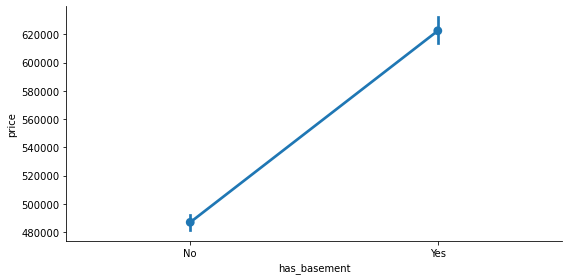

In [204]:
#basement - after binning we data shows with basement houses are costlier and have higher 
#living measure (mean & median)
print(sns.factorplot(x='has_basement',y='price',data=house_df, size = 4, aspect = 2))
house_df.groupby('has_basement')['price','living_measure'].agg(['mean','median','size'])

AxesSubplot(0.125,0.125;0.775x0.755)


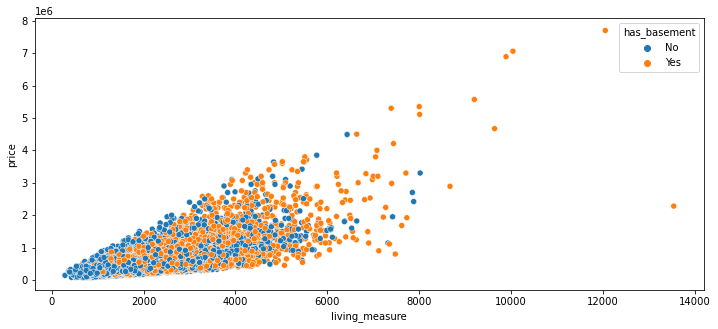

In [206]:
#basement - have higher price & living measure
plt.figure(figsize=(12,5))
print(sns.scatterplot(house_df['living_measure'],house_df['price'],hue=house_df['has_basement']))

AxesSubplot(0.125,0.125;0.775x0.755)


mean    median  size
yr_built                               
1900.0    581536.632184  549000.0    87
1901.0    557108.344828  550000.0    29
1902.0    673192.592593  624000.0    27
1903.0    480958.195652  461000.0    46
1904.0    583867.755556  478000.0    45
...                 ...       ...   ...
2011.0    544648.384615  440000.0   130
2012.0    527436.982353  448475.0   170
2013.0    678599.582090  565000.0   201
2014.0    677006.203833  590962.5   574
2015.0    762970.162162  628000.0    37

[116 rows x 3 columns]

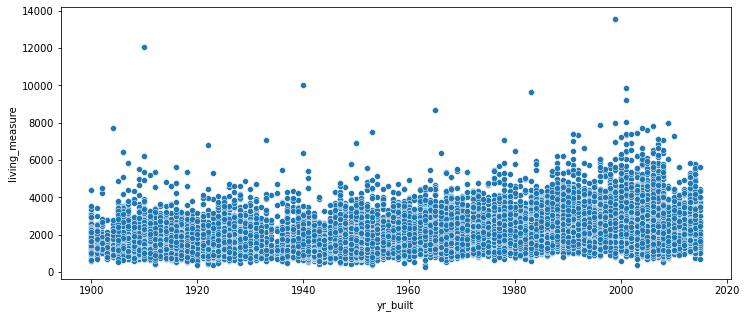

In [207]:
#yr_built - outliers can be seen easily.
plt.figure(figsize=(12,5))
print(sns.scatterplot(house_df['yr_built'],house_df['living_measure']))
#groupby
house_df.groupby('yr_built')['price'].agg(['mean','median','size'])

In [208]:
#HouseLandRatio - Computing new variable as ratio of living_measure/total_area
#Significes - Land used for construction of house
house_df["HouseLandRatio"]=np.round((house_df['living_measure']/house_df['total_area']),2)*100
house_df["HouseLandRatio"].head()

12235    16.0
14791    35.0
1742     17.0
17829    27.0
14810    17.0
Name: HouseLandRatio, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


mean    median  size
yr_renovated                               
1934.0        459950.000000  459950.0     1
1940.0        378400.000000  378400.0     2
1944.0        521000.000000  521000.0     1
1945.0        398666.666667  375000.0     3
1946.0        351137.500000  351137.5     2
...                     ...       ...   ...
2011.0        607496.153846  577000.0    13
2012.0        625181.818182  515000.0    11
2013.0        664960.810811  560000.0    37
2014.0        655030.098901  575000.0    91
2015.0        659156.250000  651000.0    16

[69 rows x 3 columns]

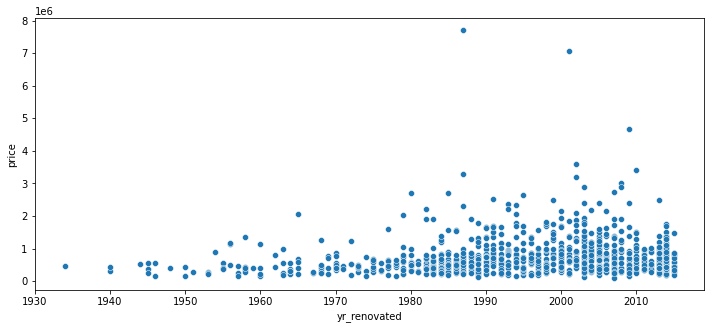

In [209]:
#yr_renovated - 
plt.figure(figsize=(12,5))
x=house_df[house_df['yr_renovated']>0]
print(sns.scatterplot(x['yr_renovated'],x['price']))
#groupby
x.groupby('yr_renovated')['price'].agg(['mean','median','size'])

In [210]:
#Lets try to group yr_renovated
#Binning Basement to analyse data
def create_renovated_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
house_df['has_renovated'] = house_df['yr_renovated'].apply(create_renovated_group)

AxesSubplot(0.125,0.125;0.775x0.755)


price                  HouseLandRatio              
                        mean    median   size           mean median   size
has_renovated                                                             
No             530447.958597  448000.0  20699      22.101889   20.0  20699
Yes            760628.777899  600000.0    914      22.291028   21.0    914

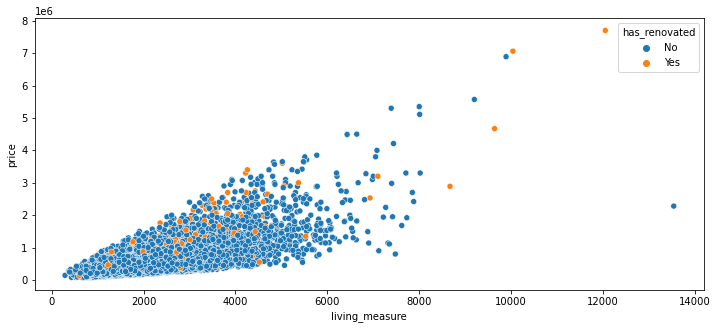

In [212]:
#has_renovated - renovated have higher mean and median, however it does not confirm if the prices of house renovated 
#actually increased or not.
#HouseLandRatio - Renovated house utilized more land area for construction of house
plt.figure(figsize=(12,5))
print(sns.scatterplot(house_df['living_measure'],house_df['price'],hue=house_df['has_renovated']))
#groupby
house_df.groupby(['has_renovated'])['price','HouseLandRatio'].agg(['mean','median','size'])

AxesSubplot(0.125,0.125;0.775x0.755)


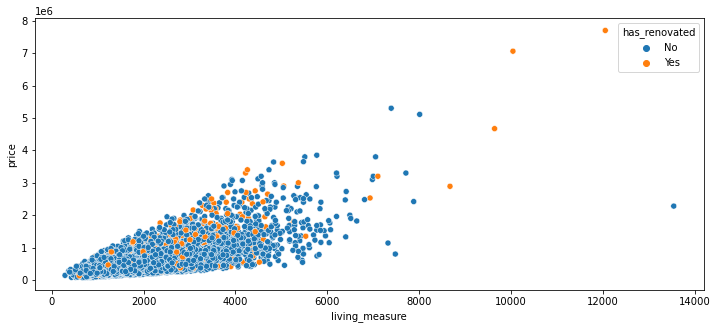

In [214]:
#has_renovated - have higher price & living measure
plt.figure(figsize=(12,5))
x=house_df[house_df['yr_built']<2000]
print(sns.scatterplot(x['living_measure'],x['price'],hue=x['has_renovated']))

AxesSubplot(0.125,0.125;0.775x0.755)


price                  living_measure                 \
                    mean    median   size           mean  median   size   
furnished                                                                 
0.0        437403.973628  401000.0  17367    1792.196695  1720.0  17367   
1.0        960565.753179  810000.0   4246    3253.342675  3110.0   4246   

          HouseLandRatio                
                    mean median   size  
furnished                               
0.0            21.549548   19.0  17367  
1.0            24.401790   24.0   4246

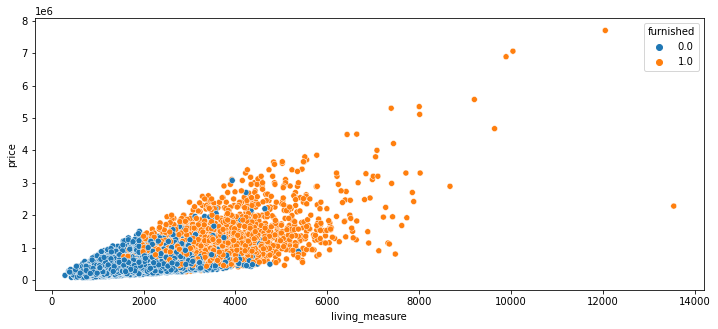

In [215]:
#furnished - Furnished has higher price value and has greater living_measure
plt.figure(figsize=(12,5))
print(sns.scatterplot(house_df['living_measure'],house_df['price'],hue=house_df['furnished']))
#groupby
house_df.groupby('furnished')['price','living_measure','HouseLandRatio'].agg(['mean','median','size'])

In [217]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

In [218]:
lowerbound,upperbound = outlier_treatment(house_df.ceil_measure)
print(lowerbound,upperbound)

-340.0 3740.0


In [219]:
house_df[(house_df.ceil_measure < lowerbound) | (house_df.ceil_measure > upperbound)]

cid   dayhours      price  room_bed  room_bath  \
17852  7.237550e+09 2014-05-12  1230000.0       4.0       4.50   
10641  3.892500e+09 2014-05-21  1550000.0       3.0       2.50   
18983  4.250690e+08 2014-05-05  1090000.0       4.0       2.50   
10456  7.397300e+09 2014-05-29  2750000.0       4.0       3.25   
1990   2.616801e+09 2014-05-30   840000.0       7.0       4.50   
...             ...        ...        ...       ...        ...   
10744  3.751600e+09 2015-05-08   510000.0       4.0       2.50   
11285  2.424059e+09 2015-05-08  2000000.0       4.0       3.25   
18840  6.065300e+09 2015-05-06  4210000.0       5.0       6.00   
9276   1.266200e+09 2015-05-06  1850000.0       4.0       3.25   
19101  1.623089e+09 2015-05-06   920000.0       4.0       3.75   

       living_measure  lot_measure  ceil  coast  sight  ...      lat     long  \
17852          5420.0     101930.0   1.0    0.0    0.0  ...  47.6561 -122.005   
10641          4460.0      26027.0   2.0    0.0    0.0  ...  47.6573 -122.173   
18983          4340.0     141570.0   2.5    0.0    0.0  ...  47.6805 -122.048   
10456          4430.0      21000.0   2.0    0.0    0.0  ...  47.6398 -122.237   
1990           4290.0      37607.0   1.5    0.0    0.0  ...  47.4812 -122.033   
...               ...          ...   ...    ...    ...  ...      ...      ...   
10744          4073.0      17334.0   2.0    0.0    0.0  ...  47.2949 -122.270   
11285          5640.0      35006.0   2.0    0.0    2.0  ...  47.5491 -122.104   
18840          7440.0      21540.0   2.0    0.0    0.0  ...  47.5692 -122.189   
9276           4160.0      10335.0   2.0    0.0    0.0  ...  47.6235 -122.192   
19101          4030.0     503989.0   2.0    0.0    0.0  ...  47.4807 -121.795   

       living_measure15  lot_measure15  furnished  total_area  month_year  \
17852            4760.0       101930.0        1.0    107350.0    May-2014   
10641            3770.0        26027.0        1.0     30487.0    May-2014   
18983            2720.0        97138.0        1.0    145910.0    May-2014   
10456            3930.0        20000.0        1.0     25430.0    May-2014   
1990             2810.0        40510.0        1.0     41897.0    May-2014   
...                 ...            ...        ...         ...         ...   
10744            1780.0         9625.0        0.0     21407.0    May-2015   
11285            4920.0        35033.0        1.0     40646.0    May-2015   
18840            4740.0        19329.0        1.0     28980.0    May-2015   
9276             1840.0        10333.0        1.0     14495.0    May-2015   
19101            2110.0        71874.0        1.0    508019.0    May-2015   

       has_basement  HouseLandRatio  has_renovated  
17852           Yes             5.0             No  
10641            No            15.0             No  
18983            No             3.0             No  
10456            No            17.0            Yes  
1990             No            10.0             No  
...             ...             ...            ...  
10744            No            19.0             No  
11285           Yes            14.0             No  
18840           Yes            26.0             No  
9276             No            29.0             No  
19101            No             1.0             No  

[611 rows x 27 columns]

In [220]:
#dropping the record from the dataset
house_df.drop(house_df[ (house_df.ceil_measure > upperbound) | (house_df.ceil_measure < lowerbound) ].index, inplace=True)

In [221]:
house_df.shape

(21002, 27)

Skewness is : 0.8200768197068193


count    21002.000000
mean      1712.190077
std        696.037662
min        290.000000
25%       1180.000000
50%       1540.000000
75%       2140.000000
max       3740.000000
Name: ceil_measure, dtype: float64

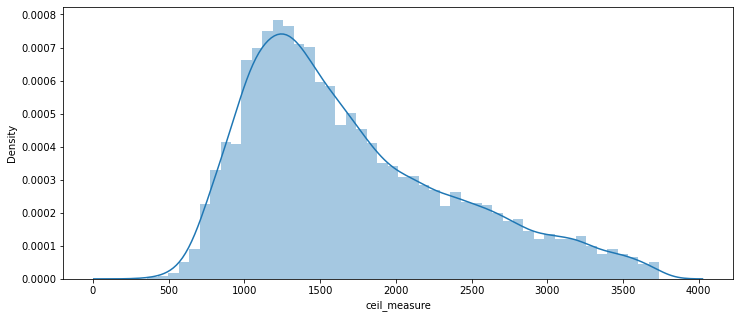

In [223]:
#ceil_measure
print("Skewness is :", house_df.ceil_measure.skew())
plt.figure(figsize=(12,5))
sns.distplot(house_df.ceil_measure)
house_df.ceil_measure.describe()

In [224]:
lowerbound_base,upperbound_base = outlier_treatment(house_df.basement)
print(lowerbound_base,upperbound_base)

-855.0 1425.0


In [226]:
house_df[(house_df.basement < lowerbound_base) | (house_df.basement > upperbound_base)]

cid   dayhours      price  room_bed  room_bath  \
1724   1.424059e+09 2014-05-16  1270000.0       4.0       3.00   
1576   5.152100e+09 2014-05-29   472000.0       6.0       2.50   
20475  9.322800e+09 2014-05-20   879950.0       4.0       2.25   
4347   3.623500e+09 2014-05-13  2450000.0       4.0       4.50   
4400   7.784400e+09 2014-05-05   497300.0       6.0       2.75   
...             ...        ...        ...       ...        ...   
2506   7.964410e+09 2015-05-04   700000.0       4.0       3.50   
4016   1.742800e+09 2015-05-04   463828.0       5.0       1.75   
9621   1.822079e+09 2015-05-04   500000.0       3.0       2.00   
4248   1.925069e+09 2015-05-11  2200000.0       5.0       4.25   
3365   2.524049e+09 2015-05-12  1380000.0       5.0       4.25   

       living_measure  lot_measure  ceil  coast  sight  ...      lat     long  \
1724           5520.0       8313.0   2.0    0.0    3.0  ...  47.5655 -122.129   
1576           4410.0      14034.0   1.0    0.0    2.0  ...  47.3376 -122.324   
20475          3500.0      13875.0   1.0    0.0    4.0  ...  47.5083 -122.388   
4347           5030.0      11023.0   2.0    0.0    2.0  ...  47.5722 -122.236   
4400           3200.0       9200.0   1.0    0.0    2.0  ...  47.4920 -122.364   
...               ...          ...   ...    ...    ...  ...      ...      ...   
2506           5360.0      25800.0   1.0    0.0    0.0  ...  47.6099 -122.054   
4016           3250.0      13702.0   1.0    0.0    2.0  ...  47.4883 -122.225   
9621           3040.0      41072.0   1.0    0.0    0.0  ...  47.3944 -121.972   
4248           4640.0      22703.0   2.0    1.0    4.0  ...  47.6393 -122.097   
3365           4050.0      18827.0   1.0    0.0    2.0  ...  47.5323 -122.237   

       living_measure15  lot_measure15  furnished  total_area  month_year  \
1724             3770.0         8278.0        1.0     13833.0    May-2014   
1576             2600.0        13988.0        1.0     18444.0    May-2014   
20475            2960.0        15000.0        1.0     17375.0    May-2014   
4347             3640.0        11490.0        1.0     16053.0    May-2014   
4400             2220.0         9500.0        0.0     12400.0    May-2014   
...                 ...            ...        ...         ...         ...   
2506             2650.0        21781.0        1.0     31160.0    May-2015   
4016             2620.0        11328.0        0.0     16952.0    May-2015   
9621             2230.0        54014.0        0.0     44112.0    May-2015   
4248             3140.0        14200.0        0.0     27343.0    May-2015   
3365             3600.0        25120.0        1.0     22877.0    May-2015   

       has_basement  HouseLandRatio  has_renovated  
1724            Yes            40.0             No  
1576            Yes            24.0             No  
20475           Yes            20.0             No  
4347            Yes            31.0             No  
4400            Yes            26.0             No  
...             ...             ...            ...  
2506            Yes            17.0             No  
4016            Yes            19.0             No  
9621            Yes             7.0             No  
4248            Yes            17.0             No  
3365            Yes            18.0             No  

[408 rows x 27 columns]

In [227]:
#dropping the record from the dataset
house_df.drop(house_df[ (house_df.basement > upperbound_base) | (house_df.basement < lowerbound_base) ].index, inplace=True)

<AxesSubplot:xlabel='basement', ylabel='Density'>

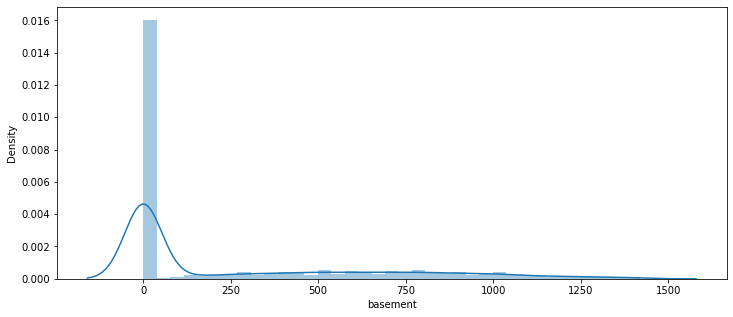

In [229]:
#basement_measure
plt.figure(figsize=(12,5))
sns.distplot(house_df.basement)

<AxesSubplot:xlabel='basement'>

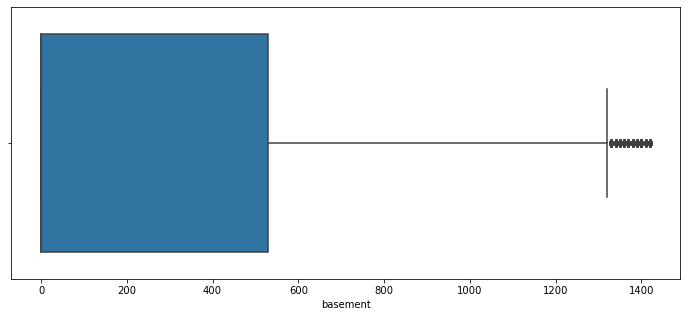

In [231]:
#Let's see the boxplot now for basement
plt.figure(figsize=(12,5))
sns.boxplot(house_df['basement'])

In [232]:
lowerbound_lim,upperbound_lim = outlier_treatment(house_df.living_measure)
print(lowerbound_lim,upperbound_lim)

-160.0 4000.0


In [233]:
house_df[(house_df.living_measure < lowerbound_lim) | (house_df.living_measure > upperbound_lim)]

cid   dayhours      price  room_bed  room_bath  \
14696  7.230001e+08 2014-05-05  1400000.0       5.0       3.50   
9776   2.516201e+08 2014-05-30  2400000.0       4.0       3.25   
15200  1.338600e+09 2014-05-28  1970000.0       8.0       3.50   
2693   8.562710e+09 2014-05-05   890000.0       4.0       4.25   
13385  3.758900e+09 2014-05-07  1530000.0       5.0       4.50   
...             ...        ...        ...       ...        ...   
18375  8.562720e+09 2015-04-30  1350000.0       4.0       3.50   
8258   2.421059e+09 2015-05-11   640000.0       4.0       2.50   
9506   1.525069e+09 2015-05-04   442500.0       5.0       3.25   
14071  5.428000e+09 2015-05-11   770000.0       5.0       3.50   
9931   1.118000e+09 2015-05-08  3400000.0       4.0       4.00   

       living_measure  lot_measure  ceil  coast  sight  ...      lat     long  \
14696          4010.0       8510.0   2.0    0.0    1.0  ...  47.6578 -122.286   
9776           4140.0      20734.0   1.0    0.0    1.0  ...  47.6344 -122.215   
15200          4440.0       6480.0   2.0    0.0    3.0  ...  47.6310 -122.303   
2693           4420.0       5750.0   2.0    0.0    0.0  ...  47.5404 -122.073   
13385          4270.0       8076.0   2.0    0.0    0.0  ...  47.6990 -122.206   
...               ...          ...   ...    ...    ...  ...      ...      ...   
18375          4740.0       8611.0   2.0    0.0    3.0  ...  47.5375 -122.070   
8258           4090.0     215186.0   2.0    0.0    0.0  ...  47.2964 -122.116   
9506           4240.0     226097.0   2.0    0.0    0.0  ...  47.6472 -122.017   
14071          4750.0       8234.0   2.0    0.0    2.0  ...  47.3574 -122.318   
9931           4260.0      11765.0   2.0    0.0    0.0  ...  47.6380 -122.288   

       living_measure15  lot_measure15  furnished  total_area  month_year  \
14696            2610.0         6128.0        1.0     12520.0    May-2014   
9776             4020.0        20008.0        1.0     24874.0    May-2014   
15200            4440.0         8640.0        1.0     10920.0    May-2014   
2693             4420.0         5750.0        1.0     10170.0    May-2014   
13385            4100.0        10631.0        1.0     12346.0    May-2014   
...                 ...            ...        ...         ...         ...   
18375            4042.0         8321.0        1.0     13351.0  April-2015   
8258             2430.0       142005.0        0.0    219276.0    May-2015   
9506             2980.0       217800.0        0.0    230337.0    May-2015   
14071            2160.0        14496.0        1.0     12984.0    May-2015   
9931             4260.0        10408.0        1.0     16025.0    May-2015   

       has_basement  HouseLandRatio  has_renovated  
14696           Yes            32.0             No  
9776            Yes            17.0            Yes  
15200           Yes            41.0             No  
2693            Yes            43.0             No  
13385           Yes            35.0             No  
...             ...             ...            ...  
18375           Yes            36.0             No  
8258            Yes             2.0             No  
9506            Yes             2.0             No  
14071           Yes            37.0             No  
9931            Yes            27.0            Yes  

[178 rows x 27 columns]

In [234]:
#dropping the record from the dataset
house_df.drop(house_df[ (house_df.living_measure > upperbound_lim) | (house_df.living_measure < lowerbound_lim) ].index, inplace=True)

<AxesSubplot:xlabel='living_measure'>

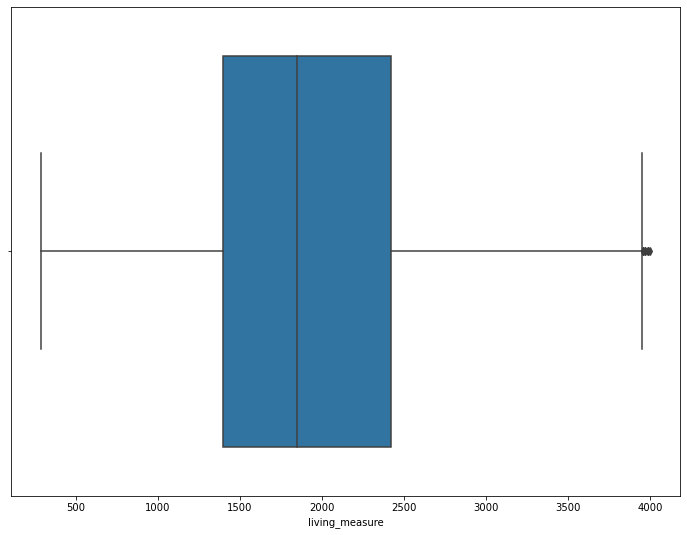

In [236]:
#let's see the boxplot after dropping the outliers
plt.figure(figsize=(12,9))
sns.boxplot(house_df['living_measure'])

<AxesSubplot:xlabel='living_measure', ylabel='Density'>

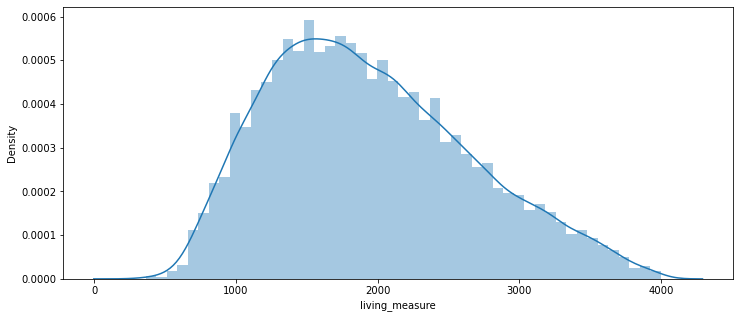

In [237]:
plt.figure(figsize=(12,5))
sns.distplot(house_df.living_measure)

In [238]:
# shape of the data after imputing outliers in living_column
house_df.shape

(20416, 27)

In [239]:
lowerbound_lom,upperbound_lom = outlier_treatment(house_df.lot_measure)
print(lowerbound_lom,upperbound_lom)

-2768.5 17947.5


In [240]:
house_df[(house_df.lot_measure < lowerbound_lom) | (house_df.lot_measure > upperbound_lom)]

cid   dayhours     price  room_bed  room_bath  living_measure  \
20407  3.200690e+08 2014-05-14  305000.0       4.0       1.50          1590.0   
10566  2.322069e+09 2014-05-07  630000.0       3.0       2.50          2680.0   
1718   3.323059e+09 2014-05-28  326000.0       3.0       2.75          1720.0   
18962  5.875503e+08 2014-05-02  604000.0       3.0       2.50          3240.0   
20401  1.240690e+08 2014-05-05  600000.0       3.0       1.75          1670.0   
...             ...        ...       ...       ...        ...             ...   
17539  7.932000e+09 2015-05-12  602500.0       2.0       2.50          3090.0   
13854  1.324079e+09 2015-05-04  378000.0       3.0       1.50          1050.0   
20733  5.561000e+09 2015-05-05  525000.0       3.0       1.75          2620.0   
19141  6.260592e+08 2015-05-06  532500.0       4.0       2.00          2220.0   
13811  4.027701e+09 2015-05-01  480000.0       3.0       1.75          2920.0   

       lot_measure  ceil  coast  sight  ...      lat     long  \
20407     131551.0   1.0    0.0    3.0  ...  47.2558 -122.024   
10566     327135.0   2.0    0.0    0.0  ...  47.3783 -122.003   
1718       28000.0   1.0    0.0    0.0  ...  47.4375 -122.176   
18962      33151.0   2.0    0.0    2.0  ...  47.3256 -122.378   
20401      39639.0   1.0    0.0    0.0  ...  47.5929 -121.989   
...            ...   ...    ...    ...  ...      ...      ...   
17539      47044.0   1.0    0.0    0.0  ...  47.4291 -122.177   
13854      57499.0   1.0    0.0    0.0  ...  47.5602 -121.860   
20733      38350.0   1.0    0.0    0.0  ...  47.4619 -121.991   
19141      23750.0   1.0    0.0    0.0  ...  47.7759 -122.214   
13811      21375.0   1.0    0.0    0.0  ...  47.7666 -122.265   

       living_measure15  lot_measure15  furnished  total_area  month_year  \
20407            2280.0       108028.0        0.0    133141.0    May-2014   
10566            2020.0        60080.0        0.0    329815.0    May-2014   
1718             2000.0        41817.0        0.0     29720.0    May-2014   
18962            4050.0        24967.0        1.0     36391.0    May-2014   
20401            2330.0        30492.0        0.0     41309.0    May-2014   
...                 ...            ...        ...         ...         ...   
17539            1860.0        62829.0        1.0     50134.0    May-2015   
13854            1460.0        42688.0        0.0     58549.0    May-2015   
20733            2170.0        36962.0        0.0     40970.0    May-2015   
19141            2650.0        21167.0        0.0     25970.0    May-2015   
13811            1540.0         8482.0        0.0     24295.0    May-2015   

       has_basement  HouseLandRatio  has_renovated  
20407            No             1.0             No  
10566            No             1.0             No  
1718             No             6.0             No  
18962            No             9.0             No  
20401            No             4.0            Yes  
...             ...             ...            ...  
17539           Yes             6.0             No  
13854            No             2.0             No  
20733           Yes             6.0             No  
19141            No             9.0             No  
13811           Yes            12.0             No  

[2124 rows x 27 columns]

In [241]:
#dropping the record from the dataset
house_df.drop(house_df[ (house_df.lot_measure > upperbound_lom) | (house_df.lot_measure < lowerbound_lom) ].index, inplace=True)

<AxesSubplot:xlabel='lot_measure'>

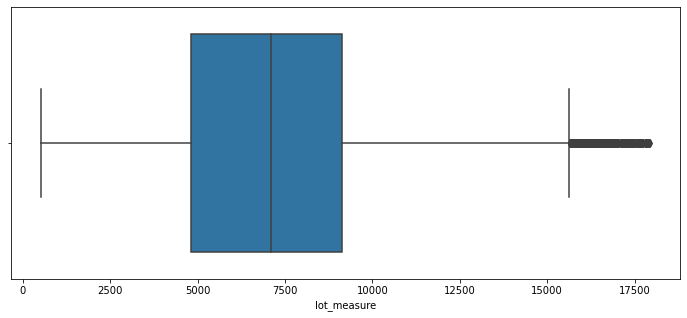

In [243]:
#let's plot after treating outliers
plt.figure(figsize=(12,5))
sns.boxplot(house_df['lot_measure'])

In [244]:
house_df.shape

(18292, 27)

In [245]:
#As we know for room_bed = 33 was outlier from our earlier findings, let's see the record and drop it
house_df[house_df['room_bed']==33]

cid   dayhours     price  room_bed  room_bath  living_measure  \
16913  2.402101e+09 2014-06-25  640000.0      33.0       1.75          1620.0   

       lot_measure  ceil  coast  sight  ...      lat     long  \
16913       6000.0   1.0    0.0    0.0  ...  47.6878 -122.331   

       living_measure15  lot_measure15  furnished  total_area  month_year  \
16913            1330.0         4700.0        0.0      7620.0   June-2014   

       has_basement  HouseLandRatio  has_renovated  
16913           Yes            21.0             No  

[1 rows x 27 columns]

In [246]:
#dropping the record from the dataset
house_df.drop(house_df[ (house_df.room_bed == 33) ].index, inplace=True)

In [247]:
house_df.shape

(18291, 27)